# LEGENDE

'TotalGHGEmissions' : Quantité des emission de CO2 (par batiment et par an?) -> **variable cible**

'SiteEnergyUse(kBtu)' : energie total bat -> **variable cible**

'NaturalGas(kBtu)' : energie gas total bat

'LargestPropertyUseTypeGFA' : Consomation d'energie du local avec la surphase la plus importante

# IMPORTATION

In [1]:
import csv
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport #https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html
#import qgrid

import pingouin as pg
import scipy
from pca import pca #pip install pca https://github.com/erdogant/pca

import ast #Tranfromer un dictioner

/home/chispitas/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## STYLE Graph

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #Montrer toutes les colonnes

#using the style 
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 
plt.rcParams["figure.figsize"] = [6, 5]

#Width
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

#Legend
plt.rcParams['legend.loc'] = 'center left'
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'w'
plt.rcParams['legend.markerscale'] = 3

#Scatter marker
plt.rcParams['scatter.marker'] = '.'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

In [3]:
direc0 = '/media/chispitas/DATOS/Documento/Estudios/DataScientist/Projecto/P4-Anticipez les besoins en consommation electrique de batiments/Git/DATA/'

dir_15 = direc0 + '2015-building-energy-benchmarking.csv'
dir_16 = direc0 + '2016-building-energy-benchmarking.csv'

dfDATA_Original_15 = pd.read_csv(dir_15, encoding='utf-8') #, delimiter='\t'
len(pd.unique(dfDATA_Original_15['OSEBuildingID']))
dfDATA_Original_15.sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
3128,29148,2015,Multifamily LR (1-4),Low-Rise Multifamily,RAINIER HOUSE,1480400051,"{'latitude': '47.55435501', 'longitude': '-122...",2,SOUTHEAST,2008,1,4.0,43732,0,43732,Multifamily Housing,Multifamily Housing,43732.0,NaN,NaN,NaN,NaN,NaN,8.0,79.4,95.6,124.2,142.2,3473109.0,4181522.0,0.0,250543.0,854890.0,26183.0,2618255.0,0.0,145.02,3.23,No,NaN,Compliant,NaN,NaN,11.0,NaN,43.0,18800
109,176,2015,SPS-District K-12,K-12 School,EMERSON ELEMENTARY SCHOOL (SPS-DISTRICT),7129302300,"{'latitude': '47.51466446', 'longitude': '-122...",2,SOUTHEAST,2001,1,3.0,78804,0,78804,K-12 School,K-12 School,78804.0,NaN,NaN,NaN,NaN,NaN,92.0,31.1,35.1,76.6,80.8,2447651.0,2763750.0,0.0,486240.0,1659120.0,7886.0,788600.0,0.0,53.45,0.59,Yes,NaN,Compliant,NaN,NaN,52.0,NaN,46.0,18800
1376,21622,2015,NonResidential,Non-Refrigerated Warehouse,WHSE MULTI TENANT,2136200605,"{'latitude': '47.53908726', 'longitude': '-122...",2,GREATER DUWAMISH,1977,1,1.0,29380,0,29380,"Non-Refrigerated Warehouse, Office, Other",Non-Refrigerated Warehouse,16768.0,Office,6837.0,Other,5775.0,NaN,30.0,28.6,28.6,89.9,89.9,841381.0,841381.0,0.0,246595.0,841416.0,0.0,0.0,0.0,5.87,0.08,No,NaN,Compliant,NaN,NaN,22.0,NaN,37.0,18388
1226,21279,2015,Multifamily MR (5-9),Mid-Rise Multifamily,WEST REPUBLICAN PLACE,1989200570,"{'latitude': '47.62305242', 'longitude': '-122...",7,MAGNOLIA / QUEEN ANNE,1992,1,5.0,33183,10625,22558,"Multifamily Housing, Office, Parking",Multifamily Housing,20087.0,Parking,10625.0,Office,2471.0,NaN,NaN,26.1,28.5,82.0,89.4,588965.0,642161.0,0.0,172616.0,588990.0,0.0,0.0,0.0,4.11,0.05,No,NaN,Compliant,NaN,NaN,50.0,NaN,40.0,19575
810,19885,2015,Multifamily MR (5-9),Mid-Rise Multifamily,COURT AT CENTENNIAL APTS,656000451,"{'latitude': '47.61676801', 'longitude': '-122...",7,DOWNTOWN,2000,1,7.0,192077,49580,142497,"Multifamily Housing, Parking",Multifamily Housing,142497.0,Parking,49580.0,NaN,NaN,NaN,97.0,26.6,28.1,83.6,88.4,3795938.0,4010624.0,0.0,1112526.0,3796096.0,0.0,0.0,0.0,26.46,0.05,No,NaN,Compliant,NaN,NaN,56.0,NaN,9.0,19576


In [4]:
dfDATA_Original_16 = pd.read_csv(dir_16, encoding='utf-8')
dfDATA_Original_16.sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
2562,26115,2016,NonResidential,Mixed Use Property,Greenus Building,500 E Pike St,Seattle,WA,98122.0,8804900865,3,EAST,47.61426,-122.32530,1924,1.0,2,24476,0,24476,"Fitness Center/Health Club/Gym, Office, Other,...",Fitness Center/Health Club/Gym,7501.0,Office,5872.0,Retail Store,5375.0,NaN,NaN,111.400002,117.199997,211.199997,219.100006,2.662054e+06,2.800725e+06,0.0,3.156803e+05,1077101.0,15849.530270,1584953.0,False,NaN,Compliant,NaN,91.69,3.75
2341,25324,2016,Multifamily LR (1-4),Low-Rise Multifamily,The Harrison,318 10th avenue east,Seattle,WA,98102.0,6852700595,3,EAST,47.62176,-122.31958,1900,1.0,3,32960,0,32960,Multifamily Housing,Multifamily Housing,32960.0,NaN,NaN,NaN,NaN,NaN,100.0,24.400000,24.400000,34.700001,34.700001,8.046205e+05,8.046205e+05,0.0,4.181460e+04,142671.0,6619.490234,661949.0,False,NaN,Compliant,NaN,36.15,1.10
146,234,2016,Nonresidential COS,Warehouse,SCL Roy Street Warehouse,802 Roy St,Seattle,WA,98109.0,4088803530,7,MAGNOLIA / QUEEN ANNE,47.62591,-122.34084,1926,1.0,2,50292,0,50292,"Non-Refrigerated Warehouse, Office, Other - Se...",Non-Refrigerated Warehouse,42345.0,Residence Hall/Dormitory,5000.0,Office,4730.0,NaN,NaN,8.000000,8.000000,25.100000,25.100000,4.304737e+05,4.304737e+05,0.0,1.261646e+05,430474.0,0.000000,0.0,False,NaN,Compliant,NaN,3.00,0.06
3295,50003,2016,Multifamily LR (1-4),Low-Rise Multifamily,LaVita Apartments,4055 8th Ave NE,Seattle,WA,98105.0,4092302015,4,NORTHEAST,47.65725,-122.32007,2014,1.0,4,21267,0,21267,"Multifamily Housing, Parking",Multifamily Housing,19633.0,Parking,3765.0,NaN,NaN,NaN,100.0,37.099998,39.599998,87.099998,93.699997,7.281670e+05,7.779334e+05,0.0,1.325774e+05,452354.0,2758.129883,275813.0,False,NaN,Compliant,NaN,17.80,0.84
472,634,2016,NonResidential,Large Office,505 FIRST AVE S BLDG (ID634),505 1ST AVE S,Seattle,WA,98104.0,7666206900,2,DOWNTOWN,47.59767,-122.33467,2009,1.0,7,287853,0,287853,"Office, Retail Store",Office,273812.0,Retail Store,12102.0,NaN,NaN,NaN,43.0,89.400002,89.400002,280.200012,280.200012,2.556711e+07,2.556711e+07,0.0,7.468518e+06,25482582.0,845.240051,84524.0,False,NaN,Compliant,NaN,182.14,0.63


# DATA PREPARATION

## COMBINING data

### Unify ID

In [5]:
dfDATA_Original_15 = dfDATA_Original_15.set_index('OSEBuildingID')
dfDATA_Original_16 = dfDATA_Original_16.set_index('OSEBuildingID')

### Unify variable

In [6]:
dfDATA_Original_16 = dfDATA_Original_16.rename(columns = {'ZipCode':'Zip Codes', 'Comments':'Comment'})
dfDATA_Original_16 = dfDATA_Original_16.rename(columns = {'TotalGHGEmissions' :'GHGEmissions(MetricTonsCO2e)'})

In [7]:
dfDATA_Original_15[['Zip Codes', 'Comment']].columns
dfDATA_Original_16[['Zip Codes', 'Comment']].columns 

Index(['Zip Codes', 'Comment'], dtype='object')

In [8]:
dfDATA_Original_16 = dfDATA_Original_16.drop(['PropertyGFATotal'], axis=1)
dfDATA_Original_15 = dfDATA_Original_15.drop(['PropertyGFATotal'], axis=1)
dfDATA_Original_15.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'Location', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'Comment',
       'ComplianceStatus', 'Outlie

### Reorganisation de la Var Location df2015 (LON, LAT,...)

In [9]:
#Exemple
gps = ast.literal_eval(dfDATA_Original_15.Location.loc[10])
address = ast.literal_eval(gps['human_address'])
print(dfDATA_Original_15.Location.loc[10])
print(gps['latitude'])
print(gps['human_address'])
print(address['city'])
print(gps)

{'latitude': '47.6141141', 'longitude': '-122.33274086', 'human_address': '{"address": "1619 9TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
47.6141141
{"address": "1619 9TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}
SEATTLE
{'latitude': '47.6141141', 'longitude': '-122.33274086', 'human_address': '{"address": "1619 9TH AVE", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}


In [10]:
for i in dfDATA_Original_15.index:
    gps = ast.literal_eval(dfDATA_Original_15.Location.loc[i])
    address = ast.literal_eval(gps['human_address'])
    #dfDATA_Original_15.loc[i,'Latitude'] = gps['latitude']
    dfDATA_Original_15.loc[i,'Latitude'] = pd.to_numeric(gps['latitude'], errors='coerce', downcast='unsigned').round(5)
    dfDATA_Original_15.loc[i,'Longitude'] = pd.to_numeric(gps['longitude'], errors='coerce', downcast='unsigned').round(5)
    dfDATA_Original_15.loc[i,'Address'] = address['address']
    dfDATA_Original_15.loc[i,'City'] = address['city']
    dfDATA_Original_15.loc[i,'State'] = address['state']
    dfDATA_Original_15.loc[i,'Zip Codes'] = pd.to_numeric(address['zip'], errors='coerce', downcast='unsigned').round(0) 

dfDATA_Original_15 = dfDATA_Original_15.drop(columns=['Location'])
dfDATA_Original_15.sample(5)

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
291,2015,SPS-District K-12,K-12 School,THURGOOD MARSHALL (SPS-DISTRICT),9344400300,3,CENTRAL,1991,1,2.0,0,64414,K-12 School,K-12 School,64714.0,NaN,NaN,NaN,NaN,NaN,63.0,37.5,43.3,117.7,136.0,2414679.0,2790234.0,0.0,707702.0,2414779.0,0.0,0.0,0.0,16.83,0.10,Yes,NaN,Compliant,NaN,NaN,39.0,NaN,18.0,98144,47.59101,-122.29813,2401 S IRVING ST,SEATTLE,WA
20112,2015,Multifamily LR (1-4),Low-Rise Multifamily,HARBOR SQUARE APTS,1224039015,1,SOUTHWEST,1990,1,3.0,0,28033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,32.6,35.0,69.3,75.5,909703.0,976271.0,0.0,137554.0,469353.0,4404.0,440369.0,0.0,26.66,0.88,No,NaN,Compliant,NaN,NaN,41.0,NaN,49.0,98126,47.58155,-122.37349,2425 HARBOR AVE SW,SEATTLE,WA
24458,2015,NonResidential,Small- and Mid-Sized Office,OLD SQUIRE SHOP BLDG,7666204820,2,GREATER DUWAMISH,1913,1,4.0,12870,40970,"Office, Parking",Office,42800.0,Parking,10400.0,NaN,NaN,NaN,70.0,66.1,71.6,181.9,187.7,2827818.0,3062345.0,0.0,675507.0,2304926.0,5230.0,522988.0,0.0,43.84,0.63,No,NaN,Compliant,NaN,NaN,27.0,NaN,22.0,98134,47.59498,-122.32855,830 4TH AVE S,SEATTLE,WA
19730,2015,NonResidential,Other,PHINNEY NEIGHBORHOOD CTR BRICK BLDG,625049063,6,NORTHWEST,1917,1,2.0,0,28072,Social/Meeting Hall,Social/Meeting Hall,23835.0,NaN,NaN,NaN,NaN,NaN,NaN,49.6,56.9,67.2,74.8,1183408.0,1357179.0,0.0,50197.0,171279.0,10121.0,1012136.0,0.0,54.95,1.93,No,NaN,Compliant,NaN,NaN,47.0,NaN,25.0,98103,47.67779,-122.35276,6532 PHINNEY AVE N,SEATTLE,WA
25025,2015,NonResidential,Non-Refrigerated Warehouse,1801 RAINIER AVE S (ID25025),3683900005,3,GREATER DUWAMISH,1928,1,2.0,0,25955,"Non-Refrigerated Warehouse, Office, Other - Se...",Non-Refrigerated Warehouse,14150.0,Other - Services,8745.0,Office,3060.0,NaN,NaN,67.9,67.9,213.2,213.2,1762174.0,1762174.0,0.0,516464.0,1762247.0,0.0,0.0,0.0,12.28,0.18,No,NaN,Compliant,NaN,NaN,42.0,NaN,41.0,98144,47.58644,-122.30471,1801 RAINIER AVE S,SEATTLE,WA


### Joing data sets

In [11]:
#Update null elements with value in the same location in other.
dfDATA2 = dfDATA_Original_16.combine_first(dfDATA_Original_15)
dfDATA2.sample(5)

,2010 Census Tracts,Address,BuildingType,City,City Council Districts,Comment,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity,GHGEmissionsIntensity(kgCO2e/ft2),LargestPropertyUseType,LargestPropertyUseTypeGFA,Latitude,ListOfAllPropertyUseTypes,Longitude,NaturalGas(kBtu),NaturalGas(therms),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),Outlier,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyName,SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),State,SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearBuilt,YearsENERGYSTARCertified,Zip Codes
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28039,NaN,3504 SW Webster St,Multifamily LR (1-4),Seattle,NaN,NaN,Compliant,1,2016,False,70.0,727776.00,2.132989e+05,5.07,0.18,0.77,Multifamily Housing,25091.0,47.53594,"Multifamily Housing, Parking, Retail Store",-122.37703,0.000,0.000000,SOUTHWEST,1.0,3.0,0.0,NaN,Low-Rise Multifamily,28683,0,Olympic Manor,51.0,37.0,Retail Store,3592.0,25.400000,27.600000,7.277758e+05,7.916778e+05,79.699997,86.699997,WA,0.0,4319200655,Parking,0.0,1978,NaN,98126.0
50212,NaN,1400 E Galer St,Nonresidential COS,Seattle,NaN,NaN,Compliant,3,2016,False,NaN,1260869.84,3.695398e+05,259.22,11.06,NaN,Other - Recreation,23445.0,47.63228,Other - Recreation,-122.31574,4715375.781,47153.757810,EAST,1.0,1.0,NaN,NaN,Other,23445,0,Conservatory Campus,NaN,NaN,NaN,NaN,254.899994,286.500000,5.976246e+06,6.716330e+06,380.100006,413.200012,WA,0.0,2925049087,NaN,NaN,1912,NaN,NaN
26594,NaN,107 Occidental Ave S,NonResidential,Seattle,NaN,NaN,Compliant,7,2016,False,NaN,722467.00,2.117429e+05,9.72,0.45,0.27,Museum,10420.0,47.60135,"Bar/Nightclub, Food Sales, Museum, Retail Stor...",-122.33327,88170.000,881.700012,DOWNTOWN,1.0,1.0,0.0,NaN,Other,21420,0,107 Occidental Ave S,20.0,49.0,Bar/Nightclub,5000.0,41.700001,41.799999,8.106369e+05,8.123716e+05,121.599998,119.699997,WA,0.0,5247800535,Supermarket/Grocery Store,2000.0,1900,NaN,98104.0
26174,NaN,6200 Sand Point Way NE,Multifamily LR (1-4),Seattle,NaN,NaN,Compliant,4,2016,False,12.0,1222949.00,3.584259e+05,8.53,0.21,0.08,Multifamily Housing,30230.0,47.67385,"Multifamily Housing, Parking",-122.26521,0.000,0.000000,NORTHEAST,1.0,3.0,0.0,NaN,Low-Rise Multifamily,40894,0,The Sandridge Apartments,48.0,55.0,Parking,10664.0,40.500000,42.299999,1.222949e+06,1.279798e+06,127.000000,132.899994,WA,0.0,9472700000,NaN,NaN,1985,NaN,98115.0
46,NaN,3301 S NORFOLK ST,NonResidential,Seattle,NaN,NaN,Compliant,2,2016,False,1.0,44731153.00,1.310995e+07,311.84,0.44,0.18,Non-Refrigerated Warehouse,616000.0,47.51138,"Non-Refrigerated Warehouse, Office, Refrigerat...",-122.28875,0.000,0.000000,GREATER DUWAMISH,3.0,2.0,0.0,NaN,Warehouse,714095,0,Seattle 11-13,37.0,58.0,Refrigerated Warehouse,276000.0,46.400002,45.799999,4.473116e+07,4.411002e+07,145.899994,143.800003,WA,0.0,0323049024,Office,71000.0,1961,NaN,98118.0


#### Verification update 2016

In [12]:
dfE15 = dfDATA_Original_15.rename(columns = {'SiteEnergyUse(kBtu)':'2015'})
dfE16 = dfDATA_Original_16.rename(columns = {'SiteEnergyUse(kBtu)':'2016'})

Verif = pd.concat([dfE15['2015'],dfE16['2016'],dfDATA2['SiteEnergyUse(kBtu)']], axis=1)
Verif = Verif.rename(columns = {'SiteEnergyUse(kBtu)':'Upgrade'})
Verif.sample(10).style.format('{0:,.0f}').background_gradient()

,2015,2016,Upgrade
OSEBuildingID,,,
21785,"2,257,181","2,241,280","2,241,280"
673,"5,230,553","5,417,598","5,417,598"
521,"4,045,980","3,897,738","3,897,738"
23515,"706,961","709,210","709,210"
19658,"841,242",nan,"841,242"
25240,"1,210,262","1,177,583","1,177,583"
439,"57,439,532","55,073,120","55,073,120"
349,"18,350,766","18,221,224","18,221,224"
50050,nan,"2,015,280","2,015,280"


## DATA cleaning

In [13]:
# Organisation des variables (NUM/STR,DISCRETES/CONTINUES)
def lVAR_classification(dfSET):
 
    lVAR_cible = [ ] #Variable CIBLES 

    lVAR_str = dfSET.select_dtypes(exclude=[np.number, np.int64, 'datetime', 'timedelta']).columns.difference(
        lVAR_cible+[])  #Les variables str DISCRETES ET CONTINUES
    lVAR_num = dfSET.select_dtypes(include=[np.number, np.int64], exclude=['datetime', 'timedelta']).columns.difference(
        lVAR_cible+[])  #Les variables floats DISCRETES ET CONTINUES

    lVAR_str_cat = dfSET[lVAR_str].nunique().sort_values()[(dfSET.nunique()<500)].index.difference([ ]) #Les variables str DISCRETES
    lVAR_str_cont  = lVAR_str.difference(lVAR_str_cat) #Les variables floats CONTINUES

    lVAR_num_cat = dfSET[lVAR_num].nunique().sort_values()[(dfSET.nunique()<500)].index.difference(
        []) #Les variables floats DISCRETES
    lVAR_num_cont = lVAR_num.difference(lVAR_num_cat) #Les variables floats CONTINUES

    lVAR_cat = np.concatenate((lVAR_str_cat, lVAR_num_cat), axis=None)
    lVAR_cont = np.concatenate((lVAR_str_cont, lVAR_num_cont), axis=None)
    
    print('lVAR_cible',lVAR_cible)
    print('.......')
    print('lVAR_str_cat ',lVAR_str_cat)
    print('lVAR_str_cont ',lVAR_str_cont)
    print('.......')
    print('lVAR_num_cat ',lVAR_num_cat)
    print('lVAR_num_cont ',lVAR_num_cont)
    print('.......')
    print('lVAR_cat ',lVAR_cat)
    print('lVAR_cont ',lVAR_cont)
    
    return lVAR_cible, lVAR_str, lVAR_num, lVAR_cat, lVAR_cont, lVAR_str_cat, lVAR_str_cont, lVAR_num_cat, lVAR_num_cont

In [14]:
lVAR_cible, lVAR_str, lVAR_num, lVAR_cat, lVAR_cont, lVAR_str_cat, lVAR_str_cont, lVAR_num_cat, lVAR_num_cont = lVAR_classification(
    dfDATA2[dfDATA2.columns.difference([''])])

lVAR_cible []
.......
lVAR_str_cat  Index(['State', 'City', 'ComplianceStatus', 'DefaultData', 'Outlier',
       'BuildingType', 'Comment', 'Neighborhood', 'PrimaryPropertyType',
       'ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType',
       'LargestPropertyUseType', 'YearsENERGYSTARCertified',
       'ListOfAllPropertyUseTypes'],
      dtype='object')
lVAR_str_cont  Index(['Address', 'PropertyName', 'TaxParcelIdentificationNumber'], dtype='object')
.......
lVAR_num_cat  Index(['City Council Districts', 'DataYear', 'CouncilDistrictCode',
       '2010 Census Tracts', 'NumberofBuildings', 'OtherFuelUse(kBtu)',
       'NumberofFloors', 'SPD Beats', 'Zip Codes',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'ENERGYSTARScore', 'YearBuilt', 'SteamUse(kBtu)',
       'GHGEmissionsIntensity(kgCO2e/ft2)'],
      dtype='object')
lVAR_num_cont  Index(['Electricity(kBtu)', 'Electricity(kWh)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensit

### Spaces, typos, ...

#### srt var identification

In [15]:
for c in lVAR_str :
    print(c)
    dfDATA2[c] = dfDATA2[c].str.lower()
    dfDATA2[c] = dfDATA2[c].str.strip(' ')
dfDATA2.sample(5)

Address
BuildingType
City
Comment
ComplianceStatus
DefaultData
LargestPropertyUseType
ListOfAllPropertyUseTypes
Neighborhood
Outlier
PrimaryPropertyType
PropertyName
SecondLargestPropertyUseType
State
TaxParcelIdentificationNumber
ThirdLargestPropertyUseType
YearsENERGYSTARCertified


,2010 Census Tracts,Address,BuildingType,City,City Council Districts,Comment,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity,GHGEmissionsIntensity(kgCO2e/ft2),LargestPropertyUseType,LargestPropertyUseTypeGFA,Latitude,ListOfAllPropertyUseTypes,Longitude,NaturalGas(kBtu),NaturalGas(therms),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),Outlier,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyName,SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),State,SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearBuilt,YearsENERGYSTARCertified,Zip Codes
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
228,NaN,3014 nw 67th st.,nonresidential,seattle,NaN,NaN,compliant,6,2016,NaN,NaN,844864.0,2.476156e+05,59.34,1.06,0.89,other,56000.0,47.67767,other,-122.39631,1006396.0,10063.959960,ballard,1.0,3.0,0.0,NaN,other,56000,0,webster building,23.0,3.0,NaN,NaN,33.099998,37.299999,1.851260e+06,2.088978e+06,66.199997,70.699997,wa,0.0,3693901110,NaN,NaN,1973,NaN,98117.0
21880,124.0,12515 greenwood ave n,multifamily hr (10+),seattle,1.0,NaN,compliant,5,2016,NaN,77.0,3324006.0,9.742103e+05,474.86,1.67,1.57,multifamily housing,256413.0,47.72101,multifamily housing,-122.35725,8504818.0,85048.179690,northwest,1.0,10.0,0.0,NaN,high-rise multifamily,284970,0,ida culver house broadview,32.0,6.0,NaN,NaN,46.099998,47.900002,1.182882e+07,1.228613e+07,75.500000,78.000000,wa,0.0,2426039052,NaN,NaN,1990,NaN,98133.0
50045,NaN,400 9th avenue north,nonresidential,seattle,NaN,NaN,compliant,7,2016,NaN,98.0,11733018.0,3.438751e+06,202.12,0.42,NaN,office,342173.0,47.62263,"office, parking",-122.33976,2265619.0,22656.191410,lake union,1.0,12.0,NaN,NaN,large office,317189,166208,"sidneysea, llc",NaN,NaN,parking,147597.0,40.900002,42.099998,1.399864e+07,1.440945e+07,114.599998,117.599998,wa,0.0,1983200035,NaN,NaN,2015,NaN,98109.0
21812,NaN,81 vine street,multifamily mr (5-9),seattle,NaN,NaN,compliant,7,2016,NaN,89.0,723834.0,2.121437e+05,14.30,0.42,0.33,multifamily housing,34023.0,47.61455,multifamily housing,-122.35024,174281.0,1742.810059,downtown,1.0,6.0,0.0,NaN,mid-rise multifamily,34023,0,81 vine building condominium,9.0,5.0,NaN,NaN,26.400000,27.299999,8.981154e+05,9.281356e+05,72.199997,74.599998,wa,0.0,2285440000,NaN,NaN,1914,NaN,98121.0
21463,NaN,105 mercer st,multifamily lr (1-4),seattle,NaN,NaN,compliant,7,2016,NaN,84.0,344126.0,1.008576e+05,60.59,1.84,2.53,multifamily housing,24276.0,47.62428,multifamily housing,-122.35501,1095734.0,10957.339840,magnolia / queen anne,1.0,3.0,0.0,NaN,low-rise multifamily,32908,0,mercer street apts (id21463),40.0,50.0,NaN,NaN,59.299999,66.900002,1.439860e+06,1.623777e+06,91.900002,99.900002,wa,0.0,1988200240,NaN,NaN,1929,NaN,98109.0


#### Last year of 'YearsENERGYSTARCertified'

In [16]:
dfDATA2.loc[368,'YearsENERGYSTARCertified'][:4]
pd.notnull(dfDATA2.loc[2,'YearsENERGYSTARCertified'])

False

In [17]:
dfDATA2.loc[482,'YearsENERGYSTARCertified']
for i in dfDATA2.index:
    if pd.notnull(dfDATA2.loc[i,'YearsENERGYSTARCertified']): 
        dfDATA2.loc[i,'YearsENERGYSTARCertified'] = dfDATA2.loc[i,'YearsENERGYSTARCertified'][:4]

dfDATA2['YearsENERGYSTARCertified'] = pd.to_numeric(dfDATA2['YearsENERGYSTARCertified'], errors='coerce', downcast='unsigned').round(0).astype('float32') 
dfDATA2['YearsENERGYSTARCertified'].sample(20)


OSEBuildingID
470         NaN
26204       NaN
709      2010.0
25361       NaN
24250       NaN
650         NaN
20875       NaN
426         NaN
20028       NaN
23867       NaN
21921       NaN
24726       NaN
50023    2016.0
26198       NaN
532         NaN
25754       NaN
21469       NaN
27131       NaN
24547       NaN
25973       NaN
Name: YearsENERGYSTARCertified, dtype: float32

profile = ProfileReport(dfDATA2, minimal=True)
profile.to_file("dfDATA2.html")

### Missing values

In [18]:
dfDESCRIPTION = dfDATA2.describe(include='all')
dfTAUX = dfDESCRIPTION.T
LEN = len(dfDATA2)
dfTAUX['%full'] = (dfTAUX['count']/LEN)*100
dfTAUX['%unique'] = (1-dfTAUX['unique']/dfTAUX['count'])*100
dfTAUX.drop(['top'], axis=1,inplace = True)

In [19]:
dfTAUX.sort_values('%full', ascending = False ,inplace = True)
dfTAUX[['count', 'unique', 'freq', 'mean', 'std', 'min', '25%', '50%','75%', 'max', '%full', '%unique']].style.format('{0:,.1f}').background_gradient(subset=['count', 'unique', 'freq', 'mean', 'std', 'min', '25%', '50%','75%', 'max', '%full', '%unique'])

,count,unique,freq,mean,std,min,25%,50%,75%,max,%full,%unique
NumberofFloors,"3,432.0",nan,nan,4.7,5.5,0.0,2.0,4.0,5.0,99.0,100.0,nan
State,"3,432.0",1.0,"3,432.0",nan,nan,nan,nan,nan,nan,nan,100.0,100.0
PrimaryPropertyType,"3,432.0",26.0,"1,009.0",nan,nan,nan,nan,nan,nan,nan,100.0,99.2
PropertyName,"3,432.0","3,415.0",3.0,nan,nan,nan,nan,nan,nan,nan,100.0,0.5
Address,"3,432.0","3,408.0",4.0,nan,nan,nan,nan,nan,nan,nan,100.0,0.7
Neighborhood,"3,432.0",14.0,586.0,nan,nan,nan,nan,nan,nan,nan,100.0,99.6
Longitude,"3,432.0",nan,nan,-122.3,0.0,-122.4,-122.4,-122.3,-122.3,-122.2,100.0,nan
Latitude,"3,432.0",nan,nan,47.6,0.0,47.5,47.6,47.6,47.7,47.7,100.0,nan
PropertyGFAParking,"3,432.0",nan,nan,"8,166.8","33,029.2",0.0,0.0,0.0,0.0,"512,608.0",100.0,nan
PropertyGFABuilding(s),"3,432.0",nan,nan,"86,416.7","206,449.8","3,636.0","27,639.8","43,137.0","84,034.5","9,320,156.0",100.0,nan


#### Supression des variables avec un taux < taux de 'YearsENERGYSTARCertified'

In [20]:
lVAR_sup = dfTAUX[dfTAUX['%full'] < 50].index
print(lVAR_sup)
dfDATA2[lVAR_sup].sample(10) #DF des variables suprimes

Index(['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       '2010 Census Tracts', 'City Council Districts',
       'YearsENERGYSTARCertified', 'Outlier', 'DefaultData', 'Comment'],
      dtype='object')


,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,2010 Census Tracts,City Council Districts,YearsENERGYSTARCertified,Outlier,DefaultData,Comment
OSEBuildingID,,,,,,,,,,
24850,office,2213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50071,parking,8266.0,"personal services (health/beauty, dry cleaning...",1714.0,NaN,NaN,NaN,low outlier,NaN,NaN
25856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27838,supermarket/grocery store,14257.0,parking,13308.0,NaN,NaN,NaN,NaN,NaN,NaN
39673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50014,parking,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21647,parking,8167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25798,retail store,3410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
lVAR_sup = dfTAUX[dfTAUX['%full'] < 50].index
print(lVAR_sup)
dfDATA2[lVAR_sup].sample(10) #DF des variables suprimes

Index(['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       '2010 Census Tracts', 'City Council Districts',
       'YearsENERGYSTARCertified', 'Outlier', 'DefaultData', 'Comment'],
      dtype='object')


,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,2010 Census Tracts,City Council Districts,YearsENERGYSTARCertified,Outlier,DefaultData,Comment
OSEBuildingID,,,,,,,,,,
22414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19911,parking,10780.0,office,1106.0,NaN,NaN,NaN,NaN,NaN,NaN
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49822,parking,14406.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,NaN
20323,office,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Je garde : 'YearsENERGYSTARCertified', 'Longitude', 'Latitude'
lVAR_sup = lVAR_sup.difference(['YearsENERGYSTARCertified'])
dfDATA2 = dfDATA2.drop(columns=lVAR_sup)
dfTAUX = dfTAUX.drop(index=lVAR_sup)

In [23]:
dfDATA2.columns

Index(['Address', 'BuildingType', 'City', 'ComplianceStatus',
       'CouncilDistrictCode', 'DataYear', 'ENERGYSTARScore',
       'Electricity(kBtu)', 'Electricity(kWh)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'Latitude',
       'ListOfAllPropertyUseTypes', 'Longitude', 'NaturalGas(kBtu)',
       'NaturalGas(therms)', 'Neighborhood', 'NumberofBuildings',
       'NumberofFloors', 'OtherFuelUse(kBtu)', 'PrimaryPropertyType',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyName',
       'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'State', 'SteamUse(kBtu)', 'TaxParcelIdentificationNumber', 'YearBuilt',
       'YearsENERGYSTARCertified', 'Zip Codes'],
      d

#### Supression des variables avec unique = 1

In [24]:
lVAR_sup = dfTAUX[dfTAUX['unique'] == 1 ].index
dfDATA2 = dfDATA2.drop(columns=lVAR_sup)
dfTAUX = dfTAUX.drop(lVAR_sup)

print(lVAR_sup)

Index(['State', 'City'], dtype='object')


In [25]:
dfDATA2 = dfDATA2[dfDATA2['ComplianceStatus']=='compliant']
dfDATA2 = dfDATA2.drop('ComplianceStatus', axis=1)

dfDATA2 = dfDATA2.drop('DataYear', axis=1)

dfDATA2.columns

Index(['Address', 'BuildingType', 'CouncilDistrictCode', 'ENERGYSTARScore',
       'Electricity(kBtu)', 'Electricity(kWh)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'Latitude',
       'ListOfAllPropertyUseTypes', 'Longitude', 'NaturalGas(kBtu)',
       'NaturalGas(therms)', 'Neighborhood', 'NumberofBuildings',
       'NumberofFloors', 'OtherFuelUse(kBtu)', 'PrimaryPropertyType',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyName',
       'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SteamUse(kBtu)', 'TaxParcelIdentificationNumber', 'YearBuilt',
       'YearsENERGYSTARCertified', 'Zip Codes'],
      dtype='object')

#### Supression des doublons

In [26]:
print (dfDATA2.shape)
dfDATA2 = dfDATA2.drop_duplicates()
print (dfDATA2.shape)

(3267, 37)
(3267, 37)


#### Optimisation de la memoire (dtype)['YearsENERGYSTARCertified', 'YearBuilt']

In [27]:
lVAR_float = dfDATA2.select_dtypes(include=[np.floating]).columns #Les variables floats

dfDATA2[lVAR_float] = dfDATA2[lVAR_float].round(5).astype('float32')
dfDATA2[lVAR_float]

,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity,GHGEmissionsIntensity(kgCO2e/ft2),LargestPropertyUseTypeGFA,Latitude,Longitude,NaturalGas(kBtu),NaturalGas(therms),NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),YearsENERGYSTARCertified,Zip Codes
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,
1,60.0,3.946027e+06,1.156514e+06,249.979996,2.83,2.640000,88434.0,47.612202,-122.337990,1276453.0,12764.529297,1.0,12.0,0.0,31.0,14.0,81.699997,84.300003,7.226362e+06,7.456910e+06,182.500000,189.000000,2003882.00,NaN,98101.0
2,61.0,3.242851e+06,9.504252e+05,295.859985,2.86,2.380000,83880.0,47.613171,-122.333931,5145082.0,51450.816406,1.0,11.0,0.0,31.0,14.0,94.800003,97.900002,8.387933e+06,8.664479e+06,176.100006,179.399994,0.00,NaN,98101.0
3,43.0,4.952666e+07,1.451544e+07,2089.280029,2.19,1.920000,756493.0,47.613930,-122.338097,1493800.0,14938.000000,1.0,41.0,0.0,31.0,56.0,96.000000,97.699997,7.258702e+07,7.393711e+07,241.899994,244.100006,21566554.00,NaN,98101.0
5,56.0,2.768924e+06,8.115253e+05,286.429993,4.67,31.379999,61320.0,47.614120,-122.336639,1811213.0,18112.130859,1.0,10.0,0.0,31.0,56.0,110.800003,113.300003,6.794584e+06,6.946800e+06,216.199997,224.000000,2214446.25,NaN,98101.0
8,75.0,5.368607e+06,1.573449e+06,505.010010,2.88,4.020000,123445.0,47.613750,-122.340469,8803998.0,88039.984375,1.0,18.0,0.0,31.0,56.0,114.800003,118.699997,1.417261e+07,1.465650e+07,211.399994,215.600006,0.00,NaN,98121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,NaN,6.323620e+05,1.853347e+05,20.330000,1.11,NaN,18261.0,47.540668,-122.374413,299720.0,2997.199951,1.0,1.0,NaN,NaN,NaN,51.000000,56.200001,9.320821e+05,1.025432e+06,126.000000,136.600006,0.00,NaN,NaN
50223,NaN,3.965461e+05,1.162210e+05,32.169998,2.01,NaN,16000.0,47.596249,-122.322830,553730.0,5537.299805,1.0,1.0,NaN,NaN,NaN,59.400002,65.900002,9.502762e+05,1.053706e+06,114.199997,118.900002,0.00,NaN,NaN
50224,NaN,1.792159e+06,5.252517e+05,223.539993,16.99,NaN,7583.0,47.636440,-122.357841,3973739.0,39737.390625,1.0,1.0,NaN,NaN,NaN,438.200012,460.100006,5.765898e+06,6.053764e+06,744.799988,767.799988,0.00,NaN,NaN


In [28]:
dfDESCRIPTION = dfDATA2.describe(include='all')
dfTAUX = dfDESCRIPTION.T
dfTAUX.sort_values('max', ascending = False ,inplace = True)
dfTAUX[['count', 'unique', 'freq', 'mean', 'std', 'min', '25%', '50%','75%', 'max']].style.format('{0:,.0f}').background_gradient(subset=['count', 'unique', 'freq', 'mean', 'std', 'min', '25%', '50%','75%', 'max'])

,count,unique,freq,mean,std,min,25%,50%,75%,max
SiteEnergyUse(kBtu),"3,266",nan,nan,"5,547,734","22,108,536","57,133","935,085","1,794,825","4,260,132","873,923,712"
Electricity(kBtu),"3,265",nan,nan,"3,798,837","15,118,700","-115,417","642,173","1,186,017","2,871,051","657,074,368"
SiteEnergyUseWN(kBtu),"3,266",nan,nan,"5,412,612","16,426,167",0,"983,238","1,892,908","4,423,196","471,613,856"
NaturalGas(kBtu),"3,265",nan,nan,"1,397,058","6,948,064",0,0,"309,035","1,174,021","297,908,992"
Electricity(kWh),"3,265",nan,nan,"1,113,375","4,431,034","-33,827","188,210","347,602","841,457","192,577,488"
SteamUse(kBtu),"3,265",nan,nan,"288,083","3,987,236",0,0,0,0,"134,943,456"
LargestPropertyUseTypeGFA,"3,242",nan,nan,"79,441","204,741","5,656","24,950","38,964","76,590","9,320,156"
PropertyGFABuilding(s),"3,267",nan,nan,"86,985","209,960","3,636","27,515","42,712","84,312","9,320,156"
OtherFuelUse(kBtu),"3,177",nan,nan,"7,485","200,951",0,0,0,0,"8,269,669"
NaturalGas(therms),"3,265",nan,nan,"13,971","69,480",0,0,"3,090","11,740","2,979,090"


#### Filtrage des variables

In [29]:
#Variables preselectiones:
lVAR_sup = ['Electricity(kWh)', 'NaturalGas(therms)','Seattle Police Department Micro Community Policing Plan Areas', 
            'SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)',
            'SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)',
            'SecondLargestPropertyUseType', 'LargestPropertyUseType', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA','LargestPropertyUseTypeGFA',
            'GHGEmissionsIntensity','GHGEmissionsIntensity(kgCO2e/ft2)',
            'Comment', 'Comments', 'DataYear', 'PropertyName', 'Address', '2010 Census Tracts', 'City Council Districts', 'ListOfAllPropertyUseTypes', 'TaxParcelIdentificationNumber']
lVAR_columns = dfDATA2.columns
lVAR_sup = lVAR_columns.intersection(lVAR_sup)
lVAR_sup

Index(['Address', 'Electricity(kWh)', 'GHGEmissionsIntensity',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ListOfAllPropertyUseTypes',
       'NaturalGas(therms)', 'PropertyName',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'TaxParcelIdentificationNumber'],
      dtype='object')

In [30]:
dfDATA2 = dfDATA2.drop(lVAR_sup, axis=1)
dfDATA2

,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,nonresidential,7,60.0,3.946027e+06,249.979996,47.612202,-122.337990,1276453.0,downtown,1.0,12.0,0.0,hotel,88434,0,31.0,7.226362e+06,2003882.00,1927,NaN,98101.0
2,nonresidential,7,61.0,3.242851e+06,295.859985,47.613171,-122.333931,5145082.0,downtown,1.0,11.0,0.0,hotel,88502,15064,31.0,8.387933e+06,0.00,1996,NaN,98101.0
3,nonresidential,7,43.0,4.952666e+07,2089.280029,47.613930,-122.338097,1493800.0,downtown,1.0,41.0,0.0,hotel,759392,196718,31.0,7.258702e+07,21566554.00,1969,NaN,98101.0
5,nonresidential,7,56.0,2.768924e+06,286.429993,47.614120,-122.336639,1811213.0,downtown,1.0,10.0,0.0,hotel,61320,0,31.0,6.794584e+06,2214446.25,1926,NaN,98101.0
8,nonresidential,7,75.0,5.368607e+06,505.010010,47.613750,-122.340469,8803998.0,downtown,1.0,18.0,0.0,hotel,113580,62000,31.0,1.417261e+07,0.00,1980,NaN,98121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,nonresidential cos,1,NaN,6.323620e+05,20.330000,47.540668,-122.374413,299720.0,delridge neighborhoods,1.0,1.0,NaN,other,18261,0,NaN,9.320821e+05,0.00,1982,NaN,NaN
50223,nonresidential cos,2,NaN,3.965461e+05,32.169998,47.596249,-122.322830,553730.0,downtown,1.0,1.0,NaN,other,16000,0,NaN,9.502762e+05,0.00,2004,NaN,NaN
50224,nonresidential cos,7,NaN,1.792159e+06,223.539993,47.636440,-122.357841,3973739.0,magnolia / queen anne,1.0,1.0,NaN,other,13157,0,NaN,5.765898e+06,0.00,1974,NaN,NaN


### Physically impossible values

#### Variables > 0

In [31]:
lVAR_str = dfDATA2.select_dtypes(include=[np.object]).columns #Les variables str
lVAR_float = dfDATA2.select_dtypes(include=[np.floating]).columns #Les variables floats
lVAR_float

/tmp/ipykernel_26462/1982041165.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lVAR_str = dfDATA2.select_dtypes(include=[np.object]).columns #Les variables str


Index(['ENERGYSTARScore', 'Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'Latitude', 'Longitude', 'NaturalGas(kBtu)', 'NumberofBuildings',
       'NumberofFloors', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'YearsENERGYSTARCertified',
       'Zip Codes'],
      dtype='object')

In [32]:
for c in lVAR_float.difference(['Longitude', 'YearsENERGYSTARCertified']) :
    dfDATA2 = dfDATA2[dfDATA2[c]>=0]
dfDATA2

,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,nonresidential,7,60.0,3946027.0,249.979996,47.612202,-122.337990,1276453.0,downtown,1.0,12.0,0.0,hotel,88434,0,31.0,7.226362e+06,2003882.00,1927,NaN,98101.0
2,nonresidential,7,61.0,3242851.0,295.859985,47.613171,-122.333931,5145082.0,downtown,1.0,11.0,0.0,hotel,88502,15064,31.0,8.387933e+06,0.00,1996,NaN,98101.0
3,nonresidential,7,43.0,49526664.0,2089.280029,47.613930,-122.338097,1493800.0,downtown,1.0,41.0,0.0,hotel,759392,196718,31.0,7.258702e+07,21566554.00,1969,NaN,98101.0
5,nonresidential,7,56.0,2768924.0,286.429993,47.614120,-122.336639,1811213.0,downtown,1.0,10.0,0.0,hotel,61320,0,31.0,6.794584e+06,2214446.25,1926,NaN,98101.0
8,nonresidential,7,75.0,5368607.0,505.010010,47.613750,-122.340469,8803998.0,downtown,1.0,18.0,0.0,hotel,113580,62000,31.0,1.417261e+07,0.00,1980,NaN,98121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50049,multifamily lr (1-4),2,58.0,1248599.0,8.700000,47.599800,-122.320343,0.0,downtown,1.0,4.0,0.0,low-rise multifamily,44650,0,16.0,1.248599e+06,0.00,2000,NaN,98104.0
50055,multifamily mr (5-9),4,96.0,1189427.0,31.459999,47.657558,-122.315842,436269.0,northeast,2.0,7.0,0.0,mid-rise multifamily,42393,0,38.0,1.625696e+06,0.00,2014,NaN,98105.0
50057,multifamily hr (10+),7,79.0,9164908.0,395.260010,47.616520,-122.337349,6239252.0,downtown,1.0,40.0,0.0,high-rise multifamily,277566,41915,7.0,1.540416e+07,0.00,2015,NaN,98121.0


#### Chaque type d'energie < à l'energie total

In [33]:
dfDATA2[dfDATA2['Electricity(kBtu)'] > dfDATA2['SiteEnergyUse(kBtu)']]

,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
266,multifamily lr (1-4),1,85.0,1212601.0,8.450000,47.544239,-122.376167,0.0,delridge,1.0,4.0,0.0,low-rise multifamily,52134,0,51.0,1.212551e+06,0.0,2007,NaN,98126.0
325,nonresidential,7,91.0,9899135.0,69.010002,47.611710,-122.336823,0.0,downtown,1.0,4.0,0.0,retail store,111077,0,31.0,9.898724e+06,0.0,1989,NaN,98101.0
442,nonresidential,7,59.0,16760914.0,116.839996,47.621479,-122.343048,0.0,lake union,1.0,4.0,0.0,large office,155934,37854,7.0,1.676022e+07,0.0,1947,NaN,98109.0
490,nonresidential,7,69.0,3632614.0,25.320000,47.622238,-122.358498,0.0,magnolia / queen anne,1.0,5.0,0.0,small- and mid-sized office,66762,20416,40.0,3.632614e+06,0.0,1972,NaN,98119.0
606,nonresidential,2,60.0,1252324.0,8.730000,47.555149,-122.327499,0.0,greater duwamish,1.0,1.0,0.0,warehouse,93020,0,36.0,1.252324e+06,0.0,1974,NaN,98108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49697,nonresidential,7,97.0,1357120.0,9.460000,47.601212,-122.335182,0.0,downtown,1.0,6.0,0.0,mixed use property,74211,0,20.0,1.357120e+06,0.0,1902,NaN,98104.0
49734,multifamily lr (1-4),4,92.0,994195.0,6.930000,47.650822,-122.343483,0.0,lake union,1.0,4.0,0.0,low-rise multifamily,31962,0,3.0,9.941949e+05,0.0,2012,NaN,98103.0
49793,nonresidential,7,100.0,1363192.0,9.500000,47.634491,-122.376610,0.0,magnolia / queen anne,1.0,3.0,0.0,large office,76844,28217,27.0,1.363192e+06,0.0,2013,NaN,98119.0


In [34]:
dfDATA2.shape

(2444, 21)

In [35]:
lVAR_enerie = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'SteamUse(kBtu)']
for c in lVAR_enerie:
    dfDATA2 = dfDATA2[dfDATA2[c] < dfDATA2['SiteEnergyUse(kBtu)']]
dfDATA2.shape

(2042, 21)

#### La sum des energies < à l'energie total

In [36]:
dfDATA2['TotalEnergy(kBtu)'] = dfDATA2[lVAR_enerie].sum(axis=1, skipna=True, numeric_only=True)
dfDATA2[['Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'SteamUse(kBtu)', 'TotalEnergy(kBtu)','SiteEnergyUse(kBtu)']]

,Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),SteamUse(kBtu),TotalEnergy(kBtu),SiteEnergyUse(kBtu)
OSEBuildingID,,,,,,
1,3946027.0,1276453.0,0.0,2003882.00,7226362.0,7.226362e+06
2,3242851.0,5145082.0,0.0,0.00,8387933.0,8.387933e+06
3,49526664.0,1493800.0,0.0,21566554.00,72587016.0,7.258702e+07
5,2768924.0,1811213.0,0.0,2214446.25,6794583.0,6.794584e+06
8,5368607.0,8803998.0,0.0,0.00,14172605.0,1.417261e+07
...,...,...,...,...,...,...
50033,1528002.0,1002074.0,0.0,0.00,2530076.0,2.530075e+06
50038,627854.0,0.0,0.0,0.00,627854.0,6.278541e+05
50055,1189427.0,436269.0,0.0,0.00,1625696.0,1.625696e+06


In [37]:
dfDATA2 = dfDATA2[dfDATA2['SiteEnergyUse(kBtu)'] <= dfDATA2['TotalEnergy(kBtu)']*1.01]
dfDATA2.shape

(2025, 22)

#### 'NumberofBuildings', 'NumberofFloors' +1

In [38]:
dfDATA2[dfDATA2['NumberofBuildings']== 0].sample(5)

,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes,TotalEnergy(kBtu)
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,
25144,multifamily lr (1-4),5,88.0,459085.0,18.420000,47.713558,-122.355988,286490.0,northwest,0.0,3.0,0.0,low-rise multifamily,25914,0,32.0,745575.0,0.0,1967,NaN,98133.0,745575.0
21365,nonresidential,3,42.0,2998320.0,60.040001,47.608650,-122.320587,736988.0,east,0.0,3.0,0.0,medical office,39115,0,11.0,3735308.5,0.0,1963,NaN,98114.0,3735308.0
89,nonresidential,3,48.0,9886484.0,430.839996,47.612438,-122.321404,6814570.0,east,0.0,3.0,0.0,medical office,179014,0,12.0,16701055.0,0.0,1965,NaN,98122.0,16701054.0
366,nonresidential,4,70.0,2863212.0,119.029999,47.660999,-122.316261,1865277.0,northeast,0.0,5.0,0.0,small- and mid-sized office,99005,0,38.0,4728488.5,0.0,1961,NaN,98105.0,4728489.0
21285,multifamily mr (5-9),7,94.0,3763285.0,104.610001,47.621578,-122.358971,1475655.0,magnolia / queen anne,0.0,9.0,0.0,mid-rise multifamily,228675,0,40.0,5238940.5,0.0,1994,NaN,98119.0,5238940.0


In [39]:
dfDATA2[dfDATA2['NumberofFloors']== 0].sample(5)

,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes,TotalEnergy(kBtu)
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,
657,nonresidential,7,31.0,29432804.0,734.719971,47.617828,-122.337288,9970512.0,downtown,0.0,0.0,0.0,mixed use property,516407,0,7.0,39403320.00,0.0,2006,NaN,98121.0,39403316.0
40031,nonresidential,4,32.0,1815405.0,32.720001,47.682400,-122.262230,377710.0,northeast,1.0,0.0,0.0,medical office,30287,0,48.0,2193115.00,0.0,1960,NaN,98115.0,2193115.0
40034,nonresidential,4,32.0,1398591.0,145.110001,47.682541,-122.262993,2548619.0,northeast,1.0,0.0,0.0,small- and mid-sized office,21931,0,48.0,3947209.25,0.0,1960,NaN,98115.0,3947210.0
40028,nonresidential,4,69.0,9014872.0,391.700012,47.684540,-122.262352,6191888.0,northeast,1.0,0.0,0.0,warehouse,384772,0,48.0,15206762.00,0.0,1940,NaN,98115.0,15206760.0
656,nonresidential,3,53.0,12744957.0,692.119995,47.609791,-122.322983,0.0,east,1.0,0.0,0.0,medical office,225982,0,12.0,20560622.00,7815663.0,2004,NaN,98104.0,20560620.0


In [40]:
dfDATA2[(dfDATA2['NumberofBuildings']== 0) & (dfDATA2['NumberofFloors']== 0)]


,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes,TotalEnergy(kBtu)
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,
657,nonresidential,7,31.0,29432804.0,734.719971,47.617828,-122.337288,9970512.0,downtown,0.0,0.0,0.0,mixed use property,516407,0,7.0,39403320.0,0.0,2006,NaN,98121.0,39403316.0


In [41]:
dfDATA2['NumberofBuildings'][dfDATA2['NumberofBuildings']== 0] = 1
dfDATA2['NumberofFloors'] = dfDATA2['NumberofFloors']+1

#### 'YearsENERGYSTARCertified', 'YearBuilt' >0

In [42]:
dfDATA2[dfDATA2['YearBuilt'] < 1900]

,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes,TotalEnergy(kBtu)
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,


In [43]:
dfDATA2[dfDATA2['YearsENERGYSTARCertified'] < 1900]

,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes,TotalEnergy(kBtu)
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,


In [44]:
dfDATA2[dfDATA2['Zip Codes'] < 80000]

,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofBuildings,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes,TotalEnergy(kBtu)
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,


In [45]:
dfDATA2 = dfDATA2[dfDATA2['YearBuilt'] > 1900]
dfDATA2 = dfDATA2[(dfDATA2['YearsENERGYSTARCertified'] > 1900) | pd.isnull(dfDATA2['YearsENERGYSTARCertified'])]
dfDATA2 = dfDATA2[dfDATA2['Zip Codes'] > 80000]

In [46]:
dfDATA2.shape

(2000, 22)

### Outlier

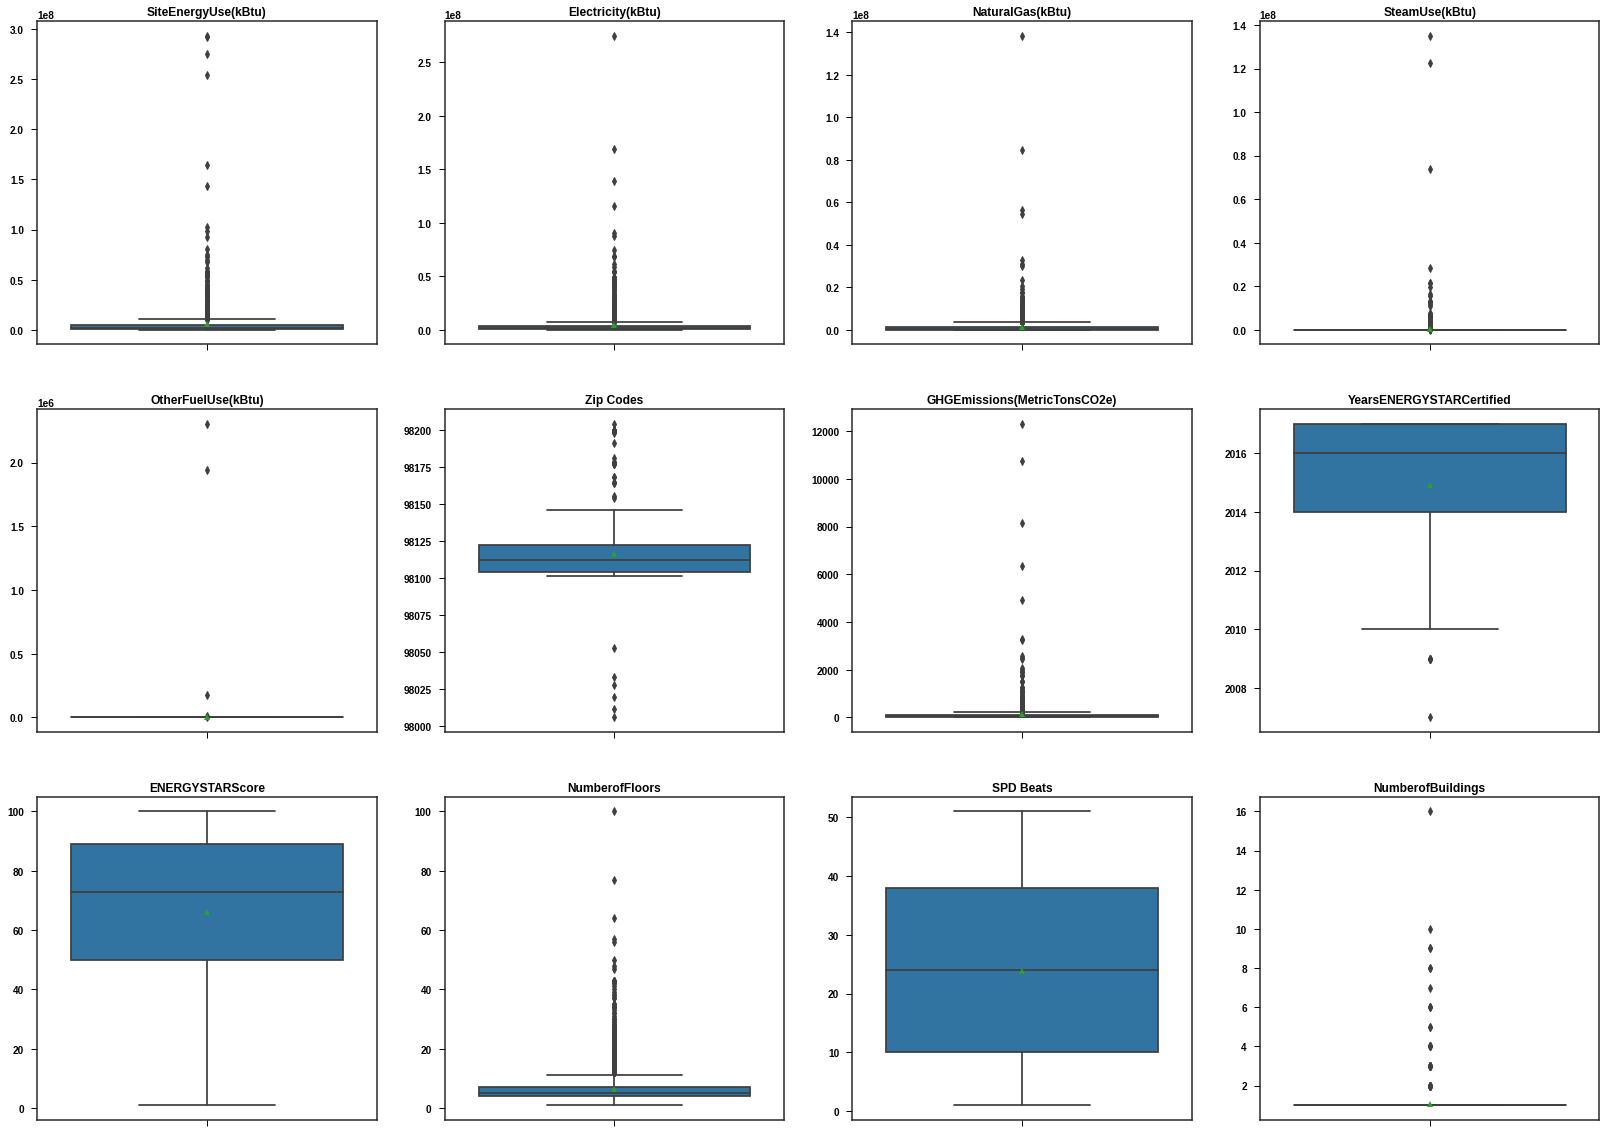

In [47]:
plt.style.use('seaborn-notebook') 

lVARS = lVAR_float.difference(['Longitude', 'Latitude'])
lVARS = dfDATA2.loc[:,lVARS].describe(include='all').T.sort_values('max', ascending = False).index #Les variables organiser par le plus grandes aux plus petites

nc = 4
nf = 9

fig = plt.figure(figsize=(7*nc, 7*nf))
plt.subplots_adjust(wspace=0.2, hspace=0.2) #interspace entre graphiques

cc = -1
for c in lVARS:
    cc = cc + 1
    
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = sns.boxplot(y=dfDATA2[c], showfliers=True, showmeans = True, ax = ax)
    ax.set_title(c)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '32-Outliers.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')


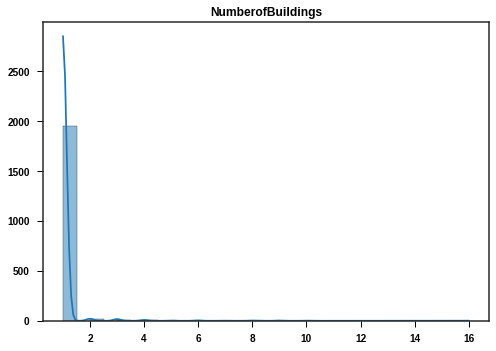

In [48]:
ax = sns.histplot(data=dfDATA2['NumberofBuildings'], common_norm=True, bins=30, kde=True)
ax.set_title('NumberofBuildings')
ax.set_ylabel('')
ax.set_xlabel('')
#ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '33-1D-Distribution-NumberofBuildings.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [49]:
dfDATA2 = dfDATA2[dfDATA2['NumberofBuildings'] == 1]
dfDATA2 = dfDATA2.drop('NumberofBuildings', axis=1)
dfDATA2

,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes,TotalEnergy(kBtu)
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,nonresidential,7,60.0,3946027.0,249.979996,47.612202,-122.337990,1276453.0,downtown,13.0,0.0,hotel,88434,0,31.0,7.226362e+06,2003882.00,1927,NaN,98101.0,7226362.0
2,nonresidential,7,61.0,3242851.0,295.859985,47.613171,-122.333931,5145082.0,downtown,12.0,0.0,hotel,88502,15064,31.0,8.387933e+06,0.00,1996,NaN,98101.0,8387933.0
3,nonresidential,7,43.0,49526664.0,2089.280029,47.613930,-122.338097,1493800.0,downtown,42.0,0.0,hotel,759392,196718,31.0,7.258702e+07,21566554.00,1969,NaN,98101.0,72587016.0
5,nonresidential,7,56.0,2768924.0,286.429993,47.614120,-122.336639,1811213.0,downtown,11.0,0.0,hotel,61320,0,31.0,6.794584e+06,2214446.25,1926,NaN,98101.0,6794583.0
8,nonresidential,7,75.0,5368607.0,505.010010,47.613750,-122.340469,8803998.0,downtown,19.0,0.0,hotel,113580,62000,31.0,1.417261e+07,0.00,1980,NaN,98121.0,14172605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50028,multifamily lr (1-4),3,62.0,1163324.0,8.110000,47.619751,-122.314667,0.0,east,5.0,0.0,low-rise multifamily,43566,0,4.0,1.163325e+06,0.00,2014,NaN,98112.0,1163324.0
50033,multifamily mr (5-9),7,84.0,1528002.0,63.869999,47.620010,-122.341957,1002074.0,lake union,7.0,0.0,mid-rise multifamily,81993,0,7.0,2.530075e+06,0.00,2014,NaN,98117.0,2530076.0
50038,nonresidential,7,84.0,627854.0,4.380000,47.661442,-122.387230,0.0,magnolia / queen anne,3.0,0.0,mixed use property,25532,0,27.0,6.278541e+05,0.00,2014,NaN,98199.0,627854.0


### Errorrs against codebook

## DATA Transformation

In [50]:
# Organisation des variables (FLOAT/STR,DISCRETES/CONTINUES)
lVAR_cible = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)/Floors', 'GHGEmissions(MetricTonsCO2e)/Floors'] #Variable CIBLES 

lVAR_str = dfDATA2.select_dtypes(exclude=[np.floating]).columns.difference(lVAR_cible)  #Les variables str DISCRETES ET CONTINUES
lVAR_float = dfDATA2.select_dtypes(include=[np.floating]).columns.difference(lVAR_cible)  #Les variables floats DISCRETES ET CONTINUES

lVAR_discret_str = dfDATA2[lVAR_str].nunique().sort_values()[(dfDATA2.nunique()<1000)].index.difference(['Comment']) #Les variables str DISCRETES
lVAR_continue_str  = lVAR_str.difference(lVAR_discret_str) #Les variables floats CONTINUES

lVAR_float_discret = dfDATA2[lVAR_float].nunique().sort_values()[(dfDATA2.nunique()<1000)].index.difference(['OtherFuelUse(kBtu)', 'SPD Beats', 'SteamUse(kBtu)', 'GHGEmissionsIntensity',
       'GHGEmissionsIntensity(kgCO2e/ft2)']) #Les variables floats DISCRETES
lVAR_float_continue = lVAR_float.difference(lVAR_float_discret) #Les variables floats CONTINUES

lVAR_discret = np.concatenate((lVAR_discret_str, lVAR_float_discret), axis=None)
lVAR_continue = np.concatenate((lVAR_continue_str, lVAR_float_continue), axis=None)

print('lVAR_discret_str ',lVAR_discret_str)
print('lVAR_continue_str ',lVAR_continue_str)

print('lVAR_float_discret ',lVAR_float_discret)
print('lVAR_float_continue ',lVAR_float_continue)

print('lVAR_discret ',lVAR_discret)
print('lVAR_continue ',lVAR_continue)

lVAR_discret_str  Index(['BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'PropertyGFAParking', 'YearBuilt'],
      dtype='object')
lVAR_continue_str  Index(['PropertyGFABuilding(s)'], dtype='object')
lVAR_float_discret  Index(['ENERGYSTARScore', 'NumberofFloors', 'YearsENERGYSTARCertified',
       'Zip Codes'],
      dtype='object')
lVAR_float_continue  Index(['Electricity(kBtu)', 'Latitude', 'Longitude', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'SPD Beats', 'SteamUse(kBtu)',
       'TotalEnergy(kBtu)'],
      dtype='object')
lVAR_discret  ['BuildingType' 'CouncilDistrictCode' 'Neighborhood' 'PrimaryPropertyType'
 'PropertyGFAParking' 'YearBuilt' 'ENERGYSTARScore' 'NumberofFloors'
 'YearsENERGYSTARCertified' 'Zip Codes']
lVAR_continue  ['PropertyGFABuilding(s)' 'Electricity(kBtu)' 'Latitude' 'Longitude'
 'NaturalGas(kBtu)' 'OtherFuelUse(kBtu)' 'SPD Beats' 'SteamUse(kBtu)'
 'TotalEnergy(kBtu)']


### Aggregating data

#### 'YearBuilt_10y' et 'YearsENERGYSTARCertified_10y'

In [51]:
dfDATA2['YearBuilt_10y'] = np.nan
dfDATA2['YearsENERGYSTARCertified_10y'] = np.nan
#['YearsENERGYSTARCertified', 'YearBuilt']:
for iy in np.arange(1900,2030,10):
    cond1 = (dfDATA2['YearBuilt']>=iy) & (dfDATA2['YearBuilt']<=iy+9)
    cond2 = (dfDATA2['YearsENERGYSTARCertified']>=iy) & (dfDATA2['YearsENERGYSTARCertified']<=iy+9)
    if [cond1]: 
        dfDATA2['YearBuilt_10y'][cond1] = iy
    if [cond2]: 
        dfDATA2['YearsENERGYSTARCertified_10y'][cond2] = iy

#dfDATA2[['YearBuilt_10y', 'YearsENERGYSTARCertified_10y']] = dfDATA2[['YearBuilt_10y', 'YearsENERGYSTARCertified_10y']].round(0).astype('float16')
dfDATA2

/tmp/ipykernel_26462/313431046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDATA2['YearBuilt_10y'][cond1] = iy
/tmp/ipykernel_26462/313431046.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDATA2['YearsENERGYSTARCertified_10y'][cond2] = iy


,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity(kBtu),GHGEmissions(MetricTonsCO2e),Latitude,Longitude,NaturalGas(kBtu),Neighborhood,NumberofFloors,OtherFuelUse(kBtu),PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,SPD Beats,SiteEnergyUse(kBtu),SteamUse(kBtu),YearBuilt,YearsENERGYSTARCertified,Zip Codes,TotalEnergy(kBtu),YearBuilt_10y,YearsENERGYSTARCertified_10y
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,
1,nonresidential,7,60.0,3946027.0,249.979996,47.612202,-122.337990,1276453.0,downtown,13.0,0.0,hotel,88434,0,31.0,7.226362e+06,2003882.00,1927,NaN,98101.0,7226362.0,1920.0,NaN
2,nonresidential,7,61.0,3242851.0,295.859985,47.613171,-122.333931,5145082.0,downtown,12.0,0.0,hotel,88502,15064,31.0,8.387933e+06,0.00,1996,NaN,98101.0,8387933.0,1990.0,NaN
3,nonresidential,7,43.0,49526664.0,2089.280029,47.613930,-122.338097,1493800.0,downtown,42.0,0.0,hotel,759392,196718,31.0,7.258702e+07,21566554.00,1969,NaN,98101.0,72587016.0,1960.0,NaN
5,nonresidential,7,56.0,2768924.0,286.429993,47.614120,-122.336639,1811213.0,downtown,11.0,0.0,hotel,61320,0,31.0,6.794584e+06,2214446.25,1926,NaN,98101.0,6794583.0,1920.0,NaN
8,nonresidential,7,75.0,5368607.0,505.010010,47.613750,-122.340469,8803998.0,downtown,19.0,0.0,hotel,113580,62000,31.0,1.417261e+07,0.00,1980,NaN,98121.0,14172605.0,1980.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50028,multifamily lr (1-4),3,62.0,1163324.0,8.110000,47.619751,-122.314667,0.0,east,5.0,0.0,low-rise multifamily,43566,0,4.0,1.163325e+06,0.00,2014,NaN,98112.0,1163324.0,2010.0,NaN
50033,multifamily mr (5-9),7,84.0,1528002.0,63.869999,47.620010,-122.341957,1002074.0,lake union,7.0,0.0,mid-rise multifamily,81993,0,7.0,2.530075e+06,0.00,2014,NaN,98117.0,2530076.0,2010.0,NaN
50038,nonresidential,7,84.0,627854.0,4.380000,47.661442,-122.387230,0.0,magnolia / queen anne,3.0,0.0,mixed use property,25532,0,27.0,6.278541e+05,0.00,2014,NaN,98199.0,627854.0,2010.0,NaN


### Extrapolating data

In [52]:
dfDATA2.columns

Index(['BuildingType', 'CouncilDistrictCode', 'ENERGYSTARScore',
       'Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'Latitude',
       'Longitude', 'NaturalGas(kBtu)', 'Neighborhood', 'NumberofFloors',
       'OtherFuelUse(kBtu)', 'PrimaryPropertyType', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'SPD Beats', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'YearBuilt', 'YearsENERGYSTARCertified', 'Zip Codes',
       'TotalEnergy(kBtu)', 'YearBuilt_10y', 'YearsENERGYSTARCertified_10y'],
      dtype='object')

### Derived measures

### Creating dummies

In [53]:
dfDATA2.columns

Index(['BuildingType', 'CouncilDistrictCode', 'ENERGYSTARScore',
       'Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'Latitude',
       'Longitude', 'NaturalGas(kBtu)', 'Neighborhood', 'NumberofFloors',
       'OtherFuelUse(kBtu)', 'PrimaryPropertyType', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'SPD Beats', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'YearBuilt', 'YearsENERGYSTARCertified', 'Zip Codes',
       'TotalEnergy(kBtu)', 'YearBuilt_10y', 'YearsENERGYSTARCertified_10y'],
      dtype='object')

### Reducing number of variables https://stackoverflow.com/questions/37815987/plot-a-correlation-circle-in-python 

#### Correlation ANOVA

In [54]:
DATA_corr = dfDATA2.copy(deep=True) #.sample(5000)
# Organisation des variables (FLOAT/STR,DISCRETES/CONTINUES)
lVAR_cible = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)/Floors', 'GHGEmissions(MetricTonsCO2e)/Floors'] #Variable CIBLES 
lVAR_cible = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)'] #Variable CIBLES 

lVAR_str = DATA_corr.select_dtypes(exclude=[np.floating]).columns.difference(lVAR_cible)  #Les variables str DISCRETES ET CONTINUES
lVAR_float = DATA_corr.select_dtypes(include=[np.floating]).columns.difference(lVAR_cible)  #Les variables floats DISCRETES ET CONTINUES

lVAR_discret_str = DATA_corr[lVAR_str].nunique().sort_values()[(DATA_corr.nunique()<1000)].index.difference(['Comment']) #Les variables str DISCRETES
lVAR_continue_str  = lVAR_str.difference(lVAR_discret_str) #Les variables floats CONTINUES

lVAR_float_discret = DATA_corr[lVAR_float].nunique().sort_values()[(DATA_corr.nunique()<1000)].index.difference(['OtherFuelUse(kBtu)', 'SPD Beats', 'SteamUse(kBtu)', 'GHGEmissionsIntensity',
       'GHGEmissionsIntensity(kgCO2e/ft2)']) #Les variables floats DISCRETES
lVAR_float_continue = lVAR_float.difference(lVAR_float_discret) #Les variables floats CONTINUES

lVAR_discret = np.concatenate((lVAR_discret_str, lVAR_float_discret), axis=None)
lVAR_continue = np.concatenate((lVAR_continue_str, lVAR_float_continue), axis=None)

print('lVAR_discret_str ',lVAR_discret_str)
print('lVAR_continue_str ',lVAR_continue_str)

print('lVAR_float_discret ',lVAR_float_discret)
print('lVAR_float_continue ',lVAR_float_continue)

print('lVAR_discret ',lVAR_discret)
print('lVAR_continue ',lVAR_continue)

lVAR_discret_str  Index(['BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'PropertyGFAParking', 'YearBuilt'],
      dtype='object')
lVAR_continue_str  Index(['PropertyGFABuilding(s)'], dtype='object')
lVAR_float_discret  Index(['ENERGYSTARScore', 'NumberofFloors', 'YearBuilt_10y',
       'YearsENERGYSTARCertified', 'YearsENERGYSTARCertified_10y',
       'Zip Codes'],
      dtype='object')
lVAR_float_continue  Index(['Electricity(kBtu)', 'Latitude', 'Longitude', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'SPD Beats', 'SteamUse(kBtu)',
       'TotalEnergy(kBtu)'],
      dtype='object')
lVAR_discret  ['BuildingType' 'CouncilDistrictCode' 'Neighborhood' 'PrimaryPropertyType'
 'PropertyGFAParking' 'YearBuilt' 'ENERGYSTARScore' 'NumberofFloors'
 'YearBuilt_10y' 'YearsENERGYSTARCertified' 'YearsENERGYSTARCertified_10y'
 'Zip Codes']
lVAR_continue  ['PropertyGFABuilding(s)' 'Electricity(kBtu)' 'Latitude' 'Longitude'
 'NaturalGas(kBtu)' 'OtherFuelUse(kB

##### Test de normalité

###### Distribution

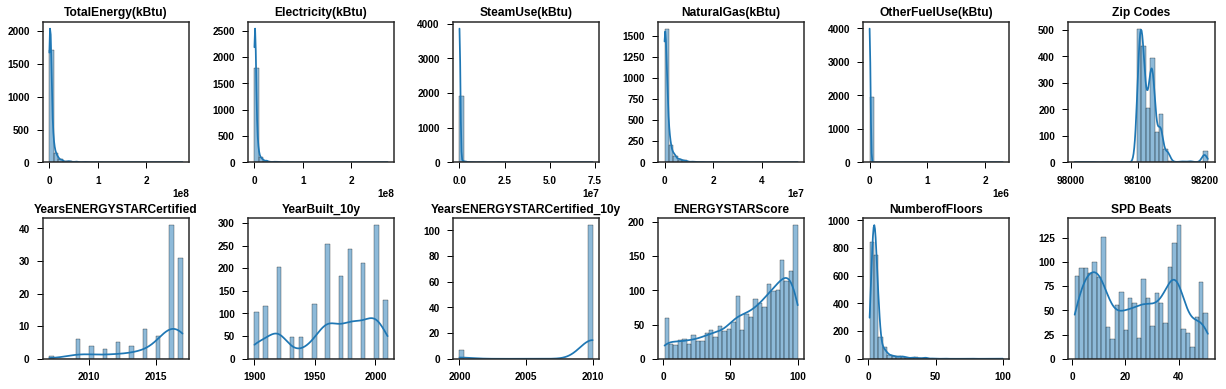

In [55]:
plt.style.use('seaborn-notebook') 

lVARS = lVAR_float.difference(['Longitude', 'Latitude'])
lVARS = DATA_corr.loc[:,lVARS].describe(include='all').T.sort_values('max', ascending = False).index #Les variables organiser par le plus grandes aux plus petites

nc = 6
nf = 9

fig = plt.figure(figsize=(7*nc/2, 7*nf/2))
plt.subplots_adjust(wspace=0.4, hspace=0.4) #interspace entre graphiques

cc = -1
for c in lVARS:
    cc = cc + 1
    
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = sns.histplot(data=DATA_corr[c],ax = ax, common_norm=True, bins=30, kde=True)
    ax.set_title(c)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '34-1D-Distribution-TOUT.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

#####  Shapiro–Wilk's test of normality
L’hypothèse nulle : La population est normalement distribuée.

Si pval < α choisi, alors l’hypothèse nulle est rejetée et il est prouvé que les données testées ne sont pas normalement distribuées.

Dans notre cas, **la probabilité que les variables soint normalement distribuées est de 0.00%**. pval < α (5%).
 


        'W': Test statistic.

        'pval': p-value.

        'normal': True if data is normally distributed.

In [56]:
pg.normality(DATA_corr, alpha=0.05).style.format('{0:,.2f}', subset=['pval', 'W'])

,W,pval,normal
CouncilDistrictCode,0.86,0.00,False
ENERGYSTARScore,0.91,0.00,False
Electricity(kBtu),0.30,0.00,False
GHGEmissions(MetricTonsCO2e),0.34,0.00,False
Latitude,0.97,0.00,False
Longitude,0.98,0.00,False
NaturalGas(kBtu),0.45,0.00,False
NumberofFloors,0.52,0.00,False
OtherFuelUse(kBtu),0.01,0.00,False
PropertyGFABuilding(s),0.50,0.00,False


**0.00% de probabilité que les variables soint normalement distribuées**

##### Visualisation de la normalité

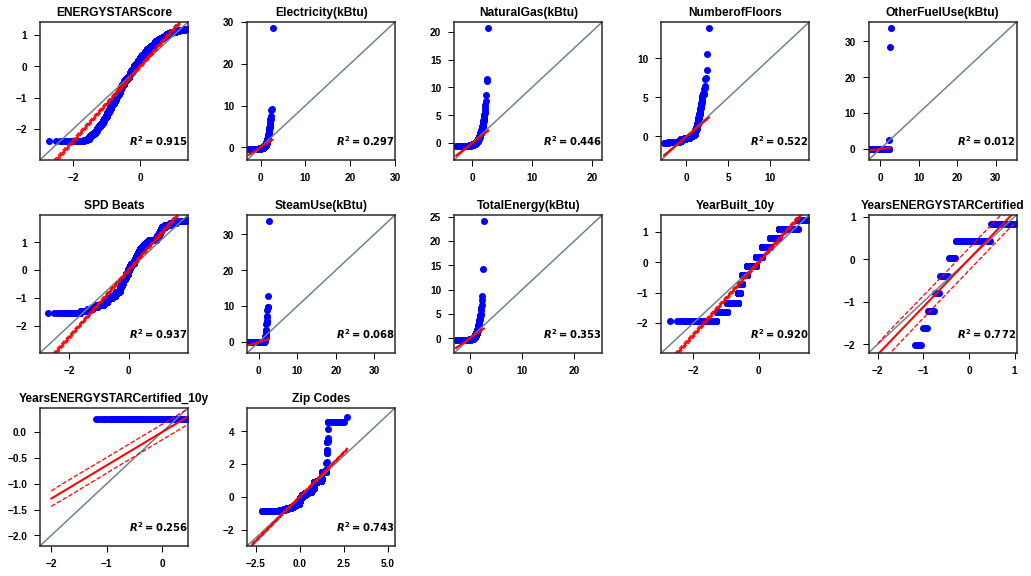

In [57]:
mean, std = 0, 0.8

plt.style.use('seaborn-notebook') 

lVARS = lVAR_float.difference(['Longitude', 'Latitude'])
#lVARS = DATA_corr.loc[:,lVARS].describe(include='all').T.sort_values('max', ascending = False).index #Les variables organiser par le plus grandes aux plus petites

nc = 5
nf = 20

fig = plt.figure(figsize=(7*nc/2, 7*nf/2))
plt.subplots_adjust(wspace=0.4, hspace=0.4) #interspace entre graphiques

cc = -1
for c in lVARS:
    cc = cc + 1
    
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = pg.qqplot(DATA_corr[c], dist='norm', sparams=(mean, std), ax=ax)
    ax.set_title(c)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '42-Distribution-NormaliteQQ.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

##### Box-Cox

TotalEnergy(kBtu)
Electricity(kBtu)
SteamUse(kBtu)
NaturalGas(kBtu)
OtherFuelUse(kBtu)
SPD Beats


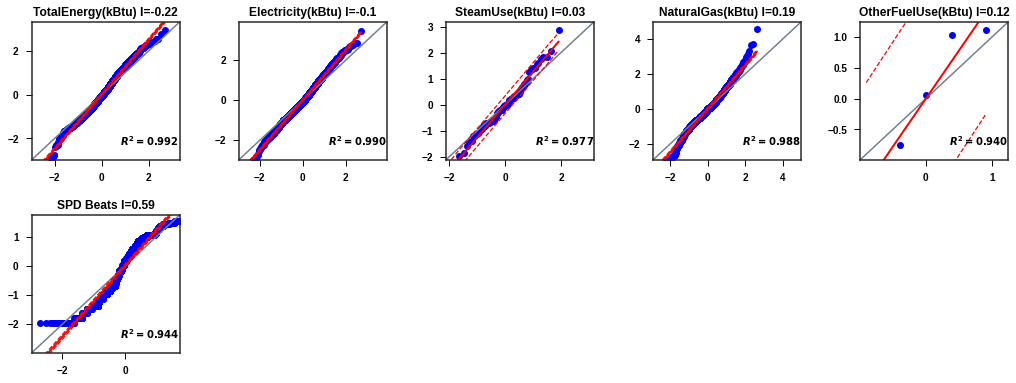

In [58]:
mean, std = 0, 0.8

plt.style.use('seaborn-notebook') 

#lVARS = lVAR_float_continue.difference(['Longitude', 'Latitude', 'YearsENERGYSTARCertified', 'SPD Beats', 'NumberofFloors', 'ENERGYSTARScore', 'YearBuilt'])
lVARS = lVAR_float_continue.difference(['Longitude', 'Latitude', 'YearsENERGYSTARCertified'])
lVARS = DATA_corr.loc[:,lVARS].describe(include='all').T.sort_values('max', ascending = False).index #Les variables organiser par le plus grandes aux plus petites

nc = 5
nf = 20

fig = plt.figure(figsize=(7*nc/2, 7*nf/2))
plt.subplots_adjust(wspace=0.4, hspace=0.4) #interspace entre graphiques

cc = -1
for c in lVARS:
    cc = cc + 1

    print(c)
    DATA_boxcox = scipy.stats.boxcox(DATA_corr[c][(DATA_corr[c] > 0)].values.tolist())
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = pg.qqplot(DATA_boxcox[0], dist='norm', sparams=(mean, std), ax=ax)
    
    DATA_boxcox, lamda = scipy.stats.boxcox(DATA_corr[c][(DATA_corr[c] > 0)].values.tolist())
    ax.set_title(c + ' l=' +str(lamda.round(2)))
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '42-Distribution-NormaliteQQ-KB.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

##### Kruskal-Wallis test
L’hypothèse nulle : La médiane de population de tous les groupes est
égale (version non paramétrique de l’ANOVA).

Dans notre cas, la probabilité que les variables soint independants est
de 0.00% -> (la probabilité que les variables soint dependants est de
100%) -> Correlation.


In [59]:
DATA_corr.columns

Index(['BuildingType', 'CouncilDistrictCode', 'ENERGYSTARScore',
       'Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'Latitude',
       'Longitude', 'NaturalGas(kBtu)', 'Neighborhood', 'NumberofFloors',
       'OtherFuelUse(kBtu)', 'PrimaryPropertyType', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'SPD Beats', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'YearBuilt', 'YearsENERGYSTARCertified', 'Zip Codes',
       'TotalEnergy(kBtu)', 'YearBuilt_10y', 'YearsENERGYSTARCertified_10y'],
      dtype='object')

In [60]:
# La fonction n'accepte pas les - ni ()
DATA_corr.columns = ['BuildingType', 'CouncilDistrictCode', 'ENERGYSTARScore',
       'Electricity_kBtu', 'GHGEmissions_MetricTonsCO2e', 'Latitude',
       'Longitude', 'NaturalGas_kBtu', 'Neighborhood', 'NumberofFloors',
       'OtherFuelUse_kBtu', 'PrimaryPropertyType', 'PropertyGFABuilding_s', 'PropertyGFAParking',
       'SPD Beats', 'SiteEnergyUse_kBtu', 'SteamUse_kBtu', 'YearBuilt',
       'YearsENERGYSTARCertified', 'Zip Codes', 'TotalEnergy_kBtu',
       'YearBuilt_10y', 'YearsENERGYSTARCertified_10y']
DATA_corr

,BuildingType,CouncilDistrictCode,ENERGYSTARScore,Electricity_kBtu,GHGEmissions_MetricTonsCO2e,Latitude,Longitude,NaturalGas_kBtu,Neighborhood,NumberofFloors,OtherFuelUse_kBtu,PrimaryPropertyType,PropertyGFABuilding_s,PropertyGFAParking,SPD Beats,SiteEnergyUse_kBtu,SteamUse_kBtu,YearBuilt,YearsENERGYSTARCertified,Zip Codes,TotalEnergy_kBtu,YearBuilt_10y,YearsENERGYSTARCertified_10y
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,
1,nonresidential,7,60.0,3946027.0,249.979996,47.612202,-122.337990,1276453.0,downtown,13.0,0.0,hotel,88434,0,31.0,7.226362e+06,2003882.00,1927,NaN,98101.0,7226362.0,1920.0,NaN
2,nonresidential,7,61.0,3242851.0,295.859985,47.613171,-122.333931,5145082.0,downtown,12.0,0.0,hotel,88502,15064,31.0,8.387933e+06,0.00,1996,NaN,98101.0,8387933.0,1990.0,NaN
3,nonresidential,7,43.0,49526664.0,2089.280029,47.613930,-122.338097,1493800.0,downtown,42.0,0.0,hotel,759392,196718,31.0,7.258702e+07,21566554.00,1969,NaN,98101.0,72587016.0,1960.0,NaN
5,nonresidential,7,56.0,2768924.0,286.429993,47.614120,-122.336639,1811213.0,downtown,11.0,0.0,hotel,61320,0,31.0,6.794584e+06,2214446.25,1926,NaN,98101.0,6794583.0,1920.0,NaN
8,nonresidential,7,75.0,5368607.0,505.010010,47.613750,-122.340469,8803998.0,downtown,19.0,0.0,hotel,113580,62000,31.0,1.417261e+07,0.00,1980,NaN,98121.0,14172605.0,1980.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50028,multifamily lr (1-4),3,62.0,1163324.0,8.110000,47.619751,-122.314667,0.0,east,5.0,0.0,low-rise multifamily,43566,0,4.0,1.163325e+06,0.00,2014,NaN,98112.0,1163324.0,2010.0,NaN
50033,multifamily mr (5-9),7,84.0,1528002.0,63.869999,47.620010,-122.341957,1002074.0,lake union,7.0,0.0,mid-rise multifamily,81993,0,7.0,2.530075e+06,0.00,2014,NaN,98117.0,2530076.0,2010.0,NaN
50038,nonresidential,7,84.0,627854.0,4.380000,47.661442,-122.387230,0.0,magnolia / queen anne,3.0,0.0,mixed use property,25532,0,27.0,6.278541e+05,0.00,2014,NaN,98199.0,627854.0,2010.0,NaN


In [61]:
# Organisation des variables (FLOAT/STR,DISCRETES/CONTINUES)
lVAR_cible = ['SiteEnergyUse_kBtu', 'GHGEmissions_MetricTonsCO2e', 'SiteEnergyUse_kBtu_m2', 'GHGEmissions_MetricTonsCO2e_m2'] #Variable CIBLES 
lVAR_cible = ['SiteEnergyUse_kBtu', 'GHGEmissions_MetricTonsCO2e'] #Variable CIBLES 

lVAR_str = DATA_corr.select_dtypes(exclude=[np.floating]).columns.difference(lVAR_cible)  #Les variables str DISCRETES ET CONTINUES
lVAR_float = DATA_corr.select_dtypes(include=[np.floating]).columns.difference(lVAR_cible)  #Les variables floats DISCRETES ET CONTINUES

lVAR_discret_str = DATA_corr[lVAR_str].nunique().sort_values()[(DATA_corr.nunique()<1000)].index.difference([]) #Les variables str DISCRETES
lVAR_float_discret = DATA_corr[lVAR_float].nunique().sort_values()[(DATA_corr.nunique()<1000)].index.difference(['PropertyGFAParking', 'OtherFuelUse_kBtu', 'SPD Beats', 'SteamUse_kBtu']) #Les variables floats DISCRETES
lVAR_float_continue = lVAR_float.difference(lVAR_float_discret) #Les variables floats CONTINUES
lVAR_discret = np.concatenate((lVAR_discret_str, lVAR_float_discret), axis=None)

print('lVAR_discret ',lVAR_discret)
print('lVAR_discret_str ',lVAR_discret_str)
print('lVAR_float_discret ',lVAR_float_discret)
print('lVAR_float_continue ',lVAR_float_continue)


lVAR_discret  ['BuildingType' 'CouncilDistrictCode' 'Neighborhood' 'PrimaryPropertyType'
 'YearBuilt' 'PropertyGFAParking' 'ENERGYSTARScore' 'NumberofFloors'
 'YearBuilt_10y' 'YearsENERGYSTARCertified' 'YearsENERGYSTARCertified_10y'
 'Zip Codes']
lVAR_discret_str  Index(['BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'YearBuilt', 'PropertyGFAParking'],
      dtype='object')
lVAR_float_discret  Index(['ENERGYSTARScore', 'NumberofFloors', 'YearBuilt_10y',
       'YearsENERGYSTARCertified', 'YearsENERGYSTARCertified_10y',
       'Zip Codes'],
      dtype='object')
lVAR_float_continue  Index(['Electricity_kBtu', 'Latitude', 'Longitude', 'NaturalGas_kBtu',
       'OtherFuelUse_kBtu', 'SPD Beats', 'SteamUse_kBtu', 'TotalEnergy_kBtu'],
      dtype='object')


In [62]:
kruskal = pd.DataFrame([], index = lVAR_discret)

for ik in kruskal.index:
    for c in lVAR_cible:
        k = pg.kruskal(dv=c, between=ik, data=DATA_corr, detailed=True)
        k = k.set_index('Source')

        #kruskal.loc[ik,c] = k.loc[[ik],['p-unc']].values
        kruskal.loc[ik,c] = k.loc[[ik], ['p-unc']].to_numpy()[0]

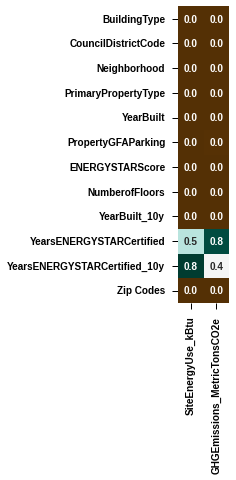

In [104]:
plt.style.use('seaborn-notebook') 
plt.rcParams["figure.figsize"] = [len(kruskal.columns)/2.2,len(kruskal.index)/2.2]
heatmap = sns.heatmap(kruskal,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '33-kruskal.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
plt.style.use('seaborn-poster') 


##### Correlation Chi-square (Les variables cibles sont continues -> pas faire le chi-square)

In [64]:
lVAR_discret

array(['BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'YearBuilt', 'PropertyGFAParking',
       'ENERGYSTARScore', 'NumberofFloors', 'YearBuilt_10y',
       'YearsENERGYSTARCertified', 'YearsENERGYSTARCertified_10y',
       'Zip Codes'], dtype=object)

In [65]:
chi2 = pd.DataFrame([], index = lVAR_discret, columns = lVAR_discret)
pval = pd.DataFrame([], index = lVAR_discret, columns = lVAR_discret)

for c in lVAR_discret:
    for f in lVAR_discret:
        if c != f:
            expected, observed, stats = pg.chi2_independence(DATA_corr, x=c, y=f)
            chi2.loc[f,c] = stats['chi2'].loc[0]
            pval.loc[f,c] = stats['pval'].loc[0]

chi2 = chi2.round(2).astype('float16')
pval = pval.round(2).astype('float16')

/home/chispitas/anaconda3/lib/python3.8/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/home/chispitas/anaconda3/lib/python3.8/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/home/chispitas/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/chispitas/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/chispitas/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


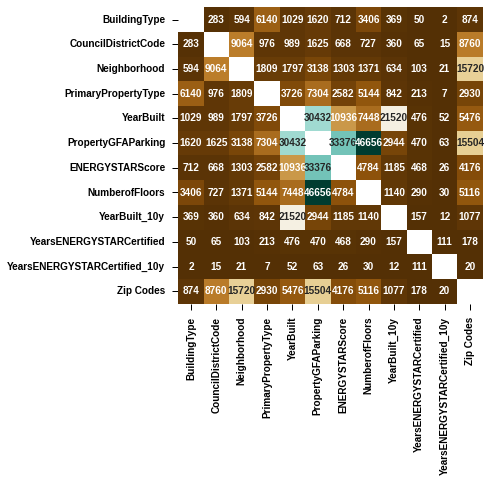

In [105]:
plt.style.use('seaborn-notebook') 
plt.rcParams["figure.figsize"] = [len(chi2.columns)/2.2,len(chi2.index)/2.2]
heatmap = sns.heatmap(chi2,  annot=True, fmt='.0f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '33-chi2_chi2.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

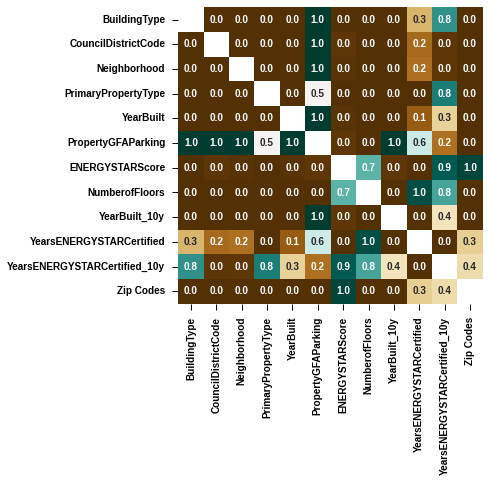

In [106]:
heatmap = sns.heatmap(pval,  annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
plt.savefig(direc0 + '33-chi2_pval.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

La probabilite que la variable 'BuildingType' et 'Neighborhood'
soient independant est du 0.0% -> (la probabilité que les variables
soint dependants est de 100%) -> Correlation.


## DATA Exploration

In [68]:
dfDATA2.columns

Index(['BuildingType', 'CouncilDistrictCode', 'ENERGYSTARScore',
       'Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'Latitude',
       'Longitude', 'NaturalGas(kBtu)', 'Neighborhood', 'NumberofFloors',
       'OtherFuelUse(kBtu)', 'PrimaryPropertyType', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'SPD Beats', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'YearBuilt', 'YearsENERGYSTARCertified', 'Zip Codes',
       'TotalEnergy(kBtu)', 'YearBuilt_10y', 'YearsENERGYSTARCertified_10y'],
      dtype='object')

In [69]:
# Organisation des variables (FLOAT/STR,DISCRETES/CONTINUES)
lVAR_cible = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)/m2', 'GHGEmissions(MetricTonsCO2e)/m2'] #Variable CIBLES 
lVAR_cible = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)'] #Variable CIBLES 

lVAR_str = dfDATA2.select_dtypes(exclude=[np.floating]).columns.difference(lVAR_cible)  #Les variables str DISCRETES ET CONTINUES
lVAR_float = dfDATA2.select_dtypes(include=[np.floating]).columns.difference(lVAR_cible)  #Les variables floats DISCRETES ET CONTINUES

lVAR_discret_str = dfDATA2[lVAR_str].nunique().sort_values()[(dfDATA2.nunique()<1000)].index.difference(['Comment']) #Les variables str DISCRETES
lVAR_continue_str  = lVAR_str.difference(lVAR_discret_str) #Les variables floats CONTINUES

lVAR_float_discret = dfDATA2[lVAR_float].nunique().sort_values()[(dfDATA2.nunique()<1000)].index.difference(['OtherFuelUse(kBtu)', 'SPD Beats', 'SteamUse(kBtu)', 'GHGEmissionsIntensity',
       'GHGEmissionsIntensity(kgCO2e/ft2)']) #Les variables floats DISCRETES
lVAR_float_continue = lVAR_float.difference(lVAR_float_discret) #Les variables floats CONTINUES

lVAR_discret = np.concatenate((lVAR_discret_str, lVAR_float_discret), axis=None)
lVAR_continue = np.concatenate((lVAR_continue_str, lVAR_float_continue), axis=None)

print('lVAR_discret_str ',lVAR_discret_str)
print('lVAR_continue_str ',lVAR_continue_str)

print('lVAR_float_discret ',lVAR_float_discret)
print('lVAR_float_continue ',lVAR_float_continue)

print('lVAR_discret ',lVAR_discret)
print('lVAR_continue ',lVAR_continue)

lVAR_discret_str  Index(['BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'PropertyGFAParking', 'YearBuilt'],
      dtype='object')
lVAR_continue_str  Index(['PropertyGFABuilding(s)'], dtype='object')
lVAR_float_discret  Index(['ENERGYSTARScore', 'NumberofFloors', 'YearBuilt_10y',
       'YearsENERGYSTARCertified', 'YearsENERGYSTARCertified_10y',
       'Zip Codes'],
      dtype='object')
lVAR_float_continue  Index(['Electricity(kBtu)', 'Latitude', 'Longitude', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'SPD Beats', 'SteamUse(kBtu)',
       'TotalEnergy(kBtu)'],
      dtype='object')
lVAR_discret  ['BuildingType' 'CouncilDistrictCode' 'Neighborhood' 'PrimaryPropertyType'
 'PropertyGFAParking' 'YearBuilt' 'ENERGYSTARScore' 'NumberofFloors'
 'YearBuilt_10y' 'YearsENERGYSTARCertified' 'YearsENERGYSTARCertified_10y'
 'Zip Codes']
lVAR_continue  ['PropertyGFABuilding(s)' 'Electricity(kBtu)' 'Latitude' 'Longitude'
 'NaturalGas(kBtu)' 'OtherFuelUse(kB

### Simple graphs

#### MAP

In [70]:
# Selection until 90% percentil
Stat = dfDATA2['SiteEnergyUse(kBtu)'].describe(percentiles=[0.95])
dfDATA2_MAP = dfDATA2[dfDATA2['SiteEnergyUse(kBtu)']<Stat.iloc[5]]

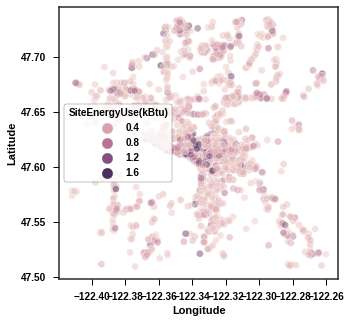

In [71]:
sns.scatterplot(data=dfDATA2_MAP, x='Longitude', y='Latitude', hue='SiteEnergyUse(kBtu)', marker='o', alpha=0.5)
plt.savefig(direc0 + '342-MAP-EnergyeUSE.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

#### 1D - Distribution

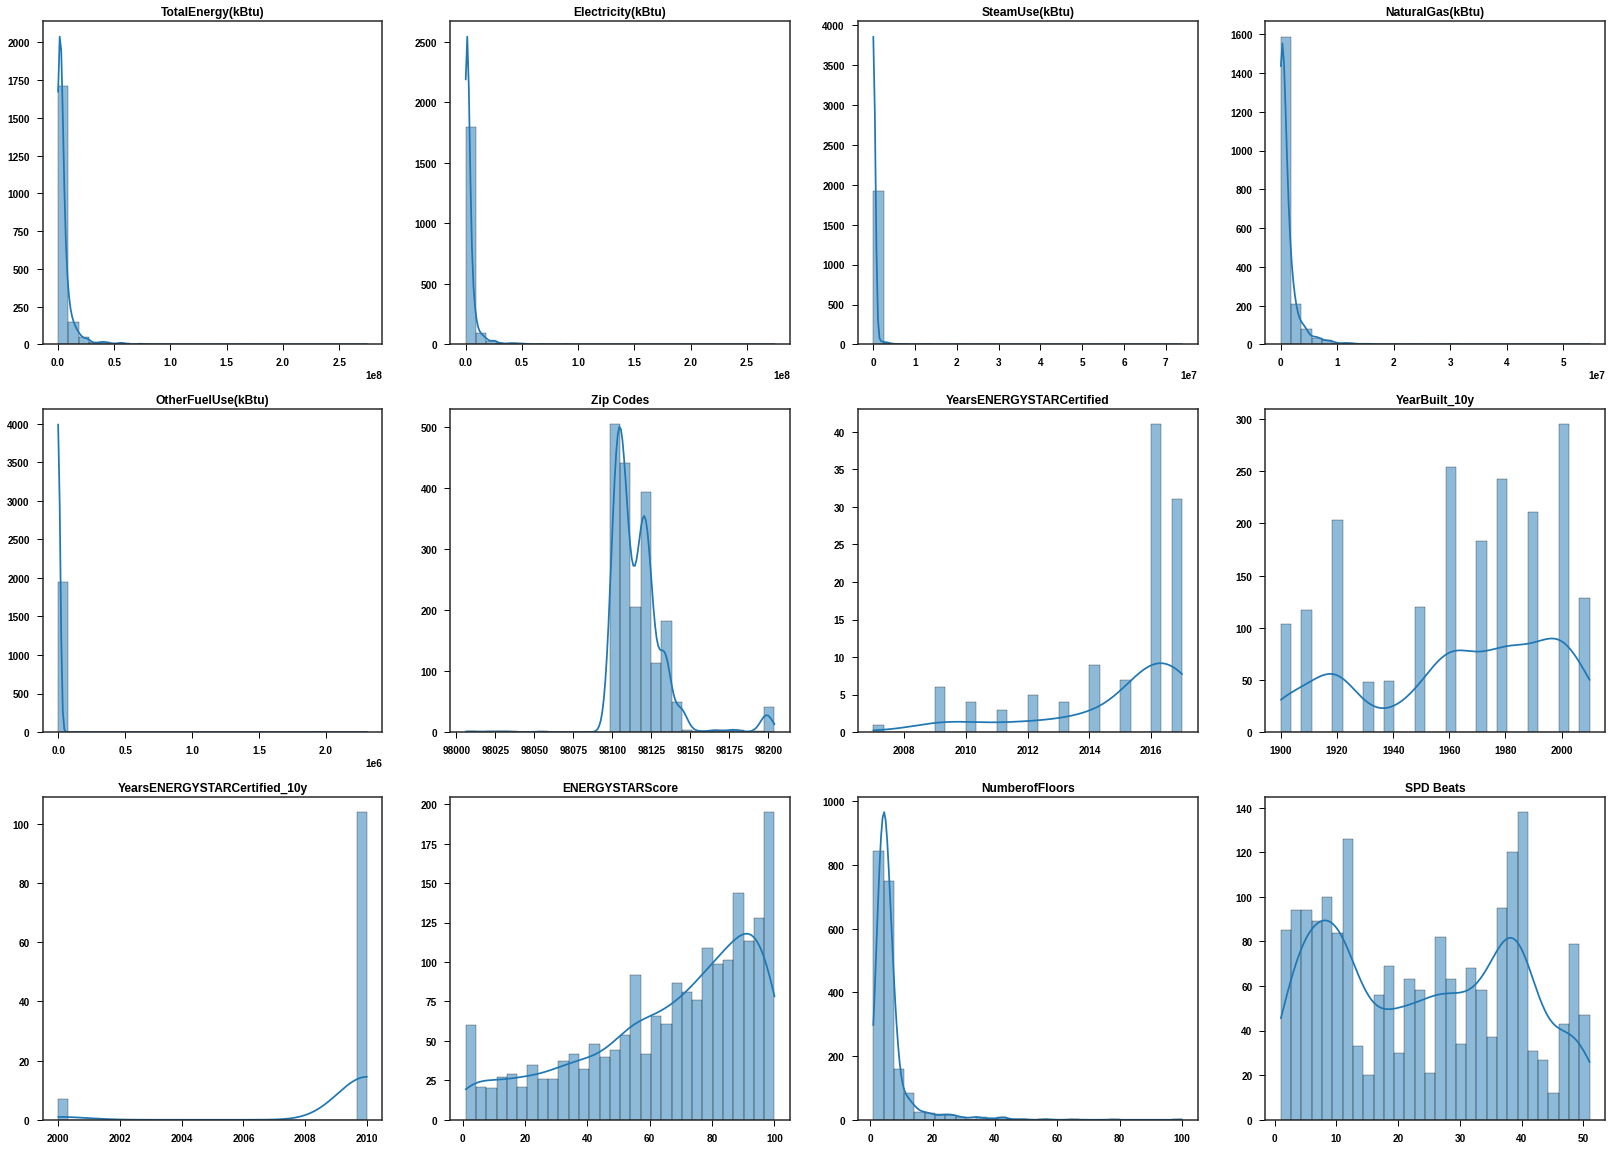

In [72]:
plt.style.use('seaborn-notebook') 

lVARS = lVAR_float.difference(['Longitude', 'Latitude'])
lVARS = dfDATA2.loc[:,lVARS].describe(include='all').T.sort_values('max', ascending = False).index #Les variables organiser par le plus grandes aux plus petites

nc = 4
nf = 9

fig = plt.figure(figsize=(7*nc, 7*nf))
plt.subplots_adjust(wspace=0.2, hspace=0.2) #interspace entre graphiques

cc = -1
for c in lVARS:
    cc = cc + 1
    
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = sns.histplot(data=dfDATA2[c],ax = ax, common_norm=True, bins=30, kde=True)
    ax.set_title(c)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '34-1D-Distribution-TOUT.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

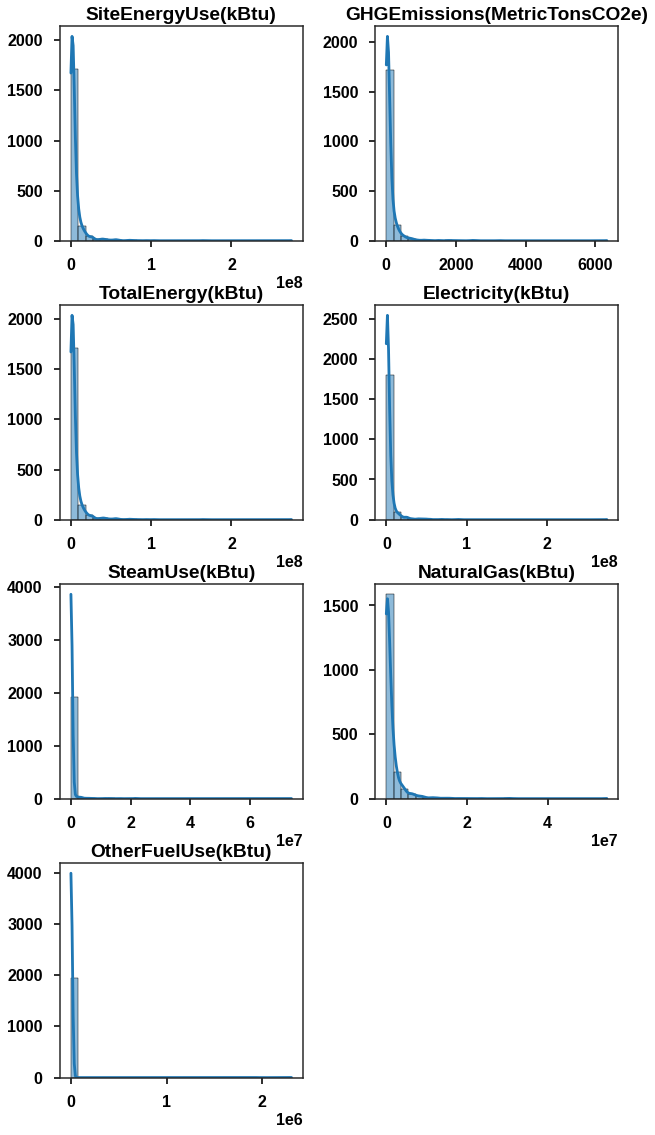

In [73]:
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 

lVARS = lVAR_float.difference(['Longitude', 'Latitude'])
lVARS = dfDATA2.loc[:,lVARS].describe(include='all').T.sort_values('max', ascending = False).index #Les variables organiser par le plus grandes aux plus petites
lVARS = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'TotalEnergy(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)']
nc = 2
nf = 9

fig = plt.figure(figsize=(5*nc, 5*nf))
plt.subplots_adjust(wspace=0.3, hspace=0.3) #interspace entre graphiques

cc = -1
for c in lVARS:
    cc = cc + 1
    
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = sns.histplot(data=dfDATA2[c],ax = ax, common_norm=True, bins=30, kde=True)
    ax.set_title(c)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '34-1D-Distribution-Energy.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [74]:
lVAR_float.difference(['Longitude', 'Latitude'])


Index(['ENERGYSTARScore', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'NumberofFloors', 'OtherFuelUse(kBtu)', 'SPD Beats', 'SteamUse(kBtu)',
       'TotalEnergy(kBtu)', 'YearBuilt_10y', 'YearsENERGYSTARCertified',
       'YearsENERGYSTARCertified_10y', 'Zip Codes'],
      dtype='object')

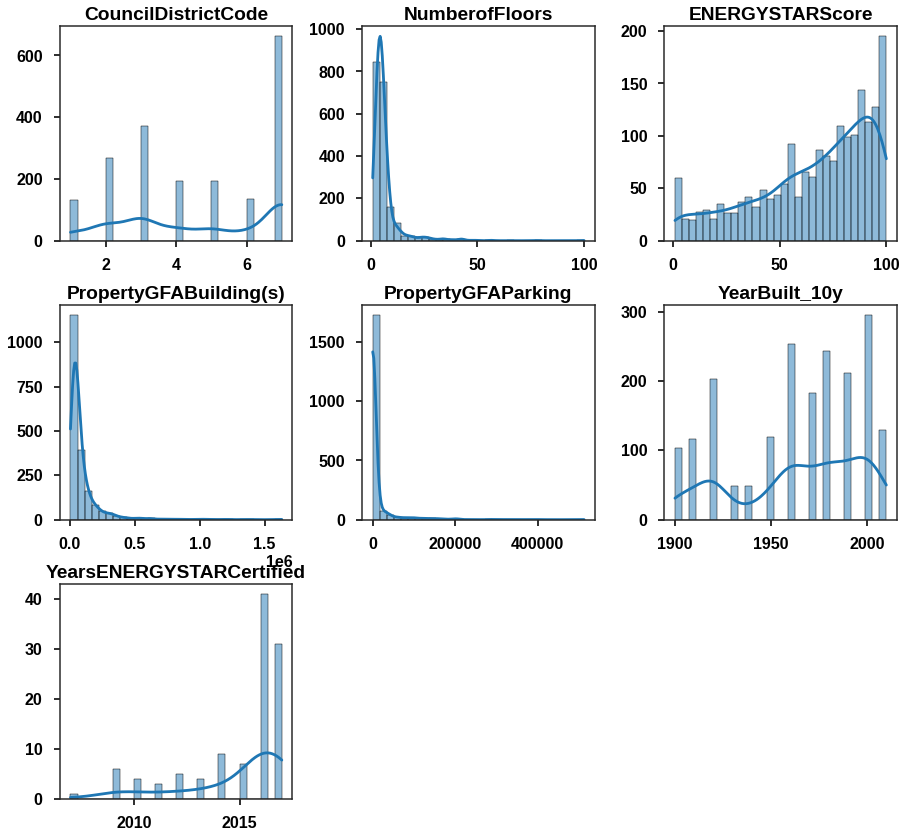

In [75]:
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 

lVARS = lVAR_float.difference(['Longitude', 'Latitude'])
lVARS = dfDATA2.loc[:,lVARS].describe(include='all').T.sort_values('max', ascending = False).index #Les variables organiser par le plus grandes aux plus petites
lVARS = ['CouncilDistrictCode', 'NumberofFloors', 'ENERGYSTARScore',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'YearBuilt_10y','YearsENERGYSTARCertified']
nc = 3
nf = 9

fig = plt.figure(figsize=(5*nc, 5*nf))
plt.subplots_adjust(wspace=0.3, hspace=0.3) #interspace entre graphiques

cc = -1
for c in lVARS:
    cc = cc + 1
    
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = sns.histplot(data=dfDATA2[c],ax = ax, common_norm=True, bins=30, kde=True)
    ax.set_title(c)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '34-1D-Distribution-other.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

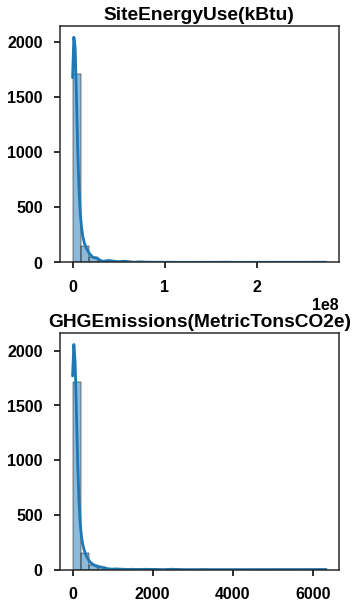

In [76]:
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 

lVARS = lVAR_float.difference(['Longitude', 'Latitude'])
lVARS = dfDATA2.loc[:,lVARS].describe(include='all').T.sort_values('max', ascending = False).index #Les variables organiser par le plus grandes aux plus petites
lVARS = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']
nc = 1
nf = 2

fig = plt.figure(figsize=(5*nc, 5*nf))
plt.subplots_adjust(wspace=0.3, hspace=0.3) #interspace entre graphiques

cc = -1
for c in lVARS:
    cc = cc + 1
    
    ax = fig.add_subplot(nf, nc, (cc+1))
    ax = sns.histplot(data=dfDATA2[c],ax = ax, common_norm=True, bins=30, kde=True)
    ax.set_title(c)
    ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '34-1D-Distribution-cible.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### Combined graphs

dfDATA_corr#### 2D - Distribution

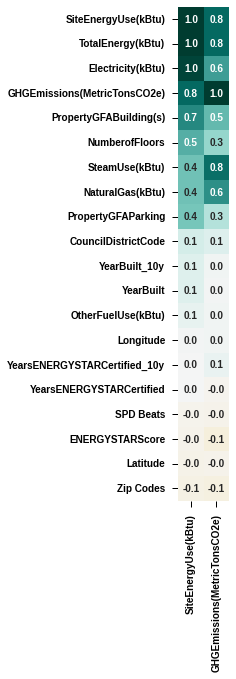

In [103]:
dfDATA_corr = dfDATA2.corr()[['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']].sort_values('SiteEnergyUse(kBtu)', ascending=False)
plt.rcParams["figure.figsize"] = [len(dfDATA_corr.columns)/2.2,len(dfDATA_corr.index)/2.2]
# define the mask to set the values in the upper triangle to True
#mask = np.triu(np.ones_like(dfDATA_corr_ZOOM8, dtype=np.bool))
heatmap = sns.heatmap(dfDATA_corr, vmin=-1, vmax=1, annot=True, fmt='.1f', cmap='BrBG', cbar=False) #, mask=mask)
#heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16); 
plt.savefig(direc0 + '342-dfDATA2_corr.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')
plt.rcParams["figure.figsize"] = [6, 5]

### Relations des Variables CONTINUE avec les variables CIBLES

In [78]:
lVAR_sns = np.concatenate((lVAR_float_continue.difference(['Latitude','Longitude','GHGEmissions(MetricTonsCO2e)/m2', 'SiteEnergyUse(kBtu)/m2']), lVAR_cible), axis=None)


In [79]:
lVAR_sns

array(['Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'SPD Beats', 'SteamUse(kBtu)', 'TotalEnergy(kBtu)',
       'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)'],
      dtype=object)

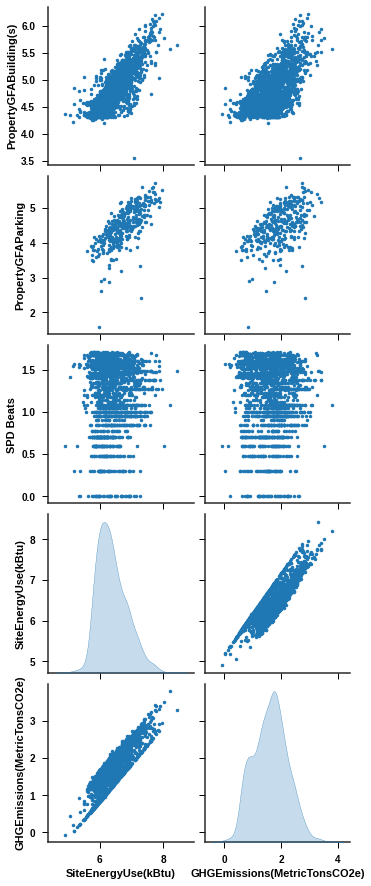

In [80]:
plt.style.use('seaborn-notebook') 
lVAR_sns = np.concatenate((lVAR_float_continue.difference(['Latitude','Longitude''GHGEmissions(MetricTonsCO2e)/m2', 'SiteEnergyUse(kBtu)/m2']), lVAR_cible), axis=None)
lVAR_sns = ['PropertyGFABuilding(s)', 'PropertyGFAParking', 'SPD Beats', 
            'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']
ax = sns.pairplot(np.log10(dfDATA2[lVAR_sns]), x_vars=lVAR_cible, diag_kind= 'kde',  plot_kws=dict(marker=".", linewidth=0))
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.savefig(direc0 + '34-DISTRIBUTION_Cont_0.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

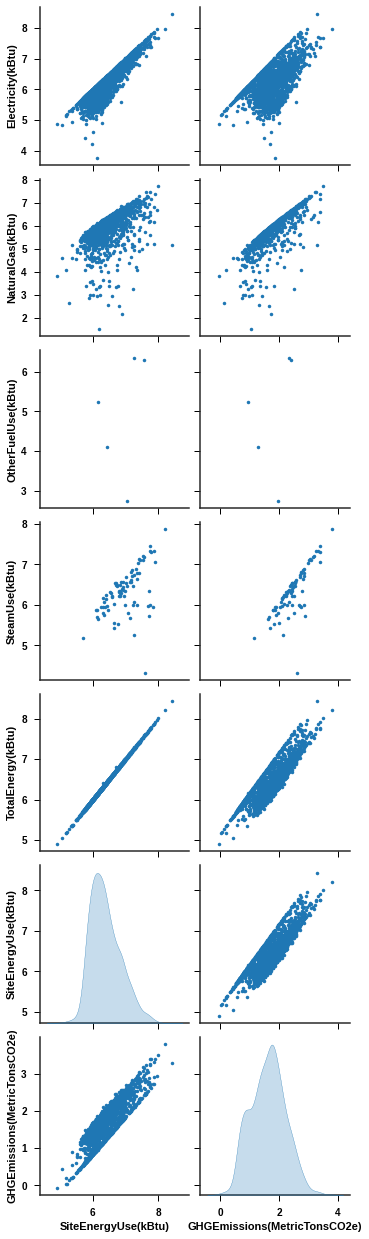

In [81]:
lVAR_sns = np.concatenate((lVAR_float_continue.difference(['Latitude','Longitude''GHGEmissions(MetricTonsCO2e)/m2', 'SiteEnergyUse(kBtu)/m2']), lVAR_cible), axis=None)
lVAR_sns = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'SteamUse(kBtu)', 'TotalEnergy(kBtu)',
            'SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']
ax = sns.pairplot(np.log10(dfDATA2[lVAR_sns]), x_vars=lVAR_cible, diag_kind= 'kde',  plot_kws=dict(marker=".", linewidth=0))
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.savefig(direc0 + '34-DISTRIBUTION_Cont_1.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### Relations des Variables DISCRETES avec les variables CIBLES

#### Organisation des variables (FLOAT/STR,DISCRETES/CONTINUES)

In [82]:
# Organisation des variables (FLOAT/STR,DISCRETES/CONTINUES)
lVAR_cible = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)/m2', 'GHGEmissions(MetricTonsCO2e)/m2'] #Variable CIBLES 
lVAR_cible = ['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)'] #Variable CIBLES 

lVAR_str = dfDATA2.select_dtypes(exclude=[np.floating]).columns.difference(lVAR_cible)  #Les variables str DISCRETES ET CONTINUES
lVAR_float = dfDATA2.select_dtypes(include=[np.floating]).columns.difference(lVAR_cible)  #Les variables floats DISCRETES ET CONTINUES

lVAR_discret_str = dfDATA2[lVAR_str].nunique().sort_values()[(dfDATA2.nunique()<500)].index.difference([]) #Les variables str DISCRETES
lVAR_float_discret = dfDATA2[lVAR_float].nunique().sort_values()[(dfDATA2.nunique()<500)].index.difference(['OtherFuelUse(kBtu)','PropertyGFAParking', 'SPD Beats', 'SteamUse(kBtu)']) #Les variables floats DISCRETES
lVAR_float_continue = lVAR_float.difference(lVAR_float_discret) #Les variables floats CONTINUES
lVAR_discret = np.concatenate((lVAR_discret_str, lVAR_float_discret), axis=None)
print('lVAR_discret ',lVAR_discret)
print('lVAR_discret_str ',lVAR_discret_str)
print('lVAR_float_discret ',lVAR_float_discret)
print('lVAR_float_continue ',lVAR_float_continue)


lVAR_discret  ['BuildingType' 'CouncilDistrictCode' 'Neighborhood' 'PrimaryPropertyType'
 'YearBuilt' 'PropertyGFAParking' 'ENERGYSTARScore' 'NumberofFloors'
 'YearBuilt_10y' 'YearsENERGYSTARCertified' 'YearsENERGYSTARCertified_10y'
 'Zip Codes']
lVAR_discret_str  Index(['BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'YearBuilt', 'PropertyGFAParking'],
      dtype='object')
lVAR_float_discret  Index(['ENERGYSTARScore', 'NumberofFloors', 'YearBuilt_10y',
       'YearsENERGYSTARCertified', 'YearsENERGYSTARCertified_10y',
       'Zip Codes'],
      dtype='object')
lVAR_float_continue  Index(['Electricity(kBtu)', 'Latitude', 'Longitude', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'SPD Beats', 'SteamUse(kBtu)',
       'TotalEnergy(kBtu)'],
      dtype='object')


#### Reorganisation DF pour SNS

In [83]:
lVAR_SNS = np.concatenate((lVAR_cible, lVAR_discret_str, lVAR_float_discret), axis=None)
lVAR_SNS

array(['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'YearBuilt', 'PropertyGFAParking',
       'ENERGYSTARScore', 'NumberofFloors', 'YearBuilt_10y',
       'YearsENERGYSTARCertified', 'YearsENERGYSTARCertified_10y',
       'Zip Codes'], dtype=object)

In [84]:
dDATA_cible = pd.melt(dfDATA2, id_vars=lVAR_SNS)
dDATA_cible

,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),BuildingType,CouncilDistrictCode,Neighborhood,PrimaryPropertyType,YearBuilt,PropertyGFAParking,ENERGYSTARScore,NumberofFloors,YearBuilt_10y,YearsENERGYSTARCertified,YearsENERGYSTARCertified_10y,Zip Codes,variable,value
0,7.226362e+06,249.979996,nonresidential,7,downtown,hotel,1927,0,60.0,13.0,1920.0,NaN,NaN,98101.0,Electricity(kBtu),3946027.0
1,8.387933e+06,295.859985,nonresidential,7,downtown,hotel,1996,15064,61.0,12.0,1990.0,NaN,NaN,98101.0,Electricity(kBtu),3242851.0
2,7.258702e+07,2089.280029,nonresidential,7,downtown,hotel,1969,196718,43.0,42.0,1960.0,NaN,NaN,98101.0,Electricity(kBtu),49526664.0
3,6.794584e+06,286.429993,nonresidential,7,downtown,hotel,1926,0,56.0,11.0,1920.0,NaN,NaN,98101.0,Electricity(kBtu),2768924.0
4,1.417261e+07,505.010010,nonresidential,7,downtown,hotel,1980,62000,75.0,19.0,1980.0,NaN,NaN,98121.0,Electricity(kBtu),5368607.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17599,1.163325e+06,8.110000,multifamily lr (1-4),3,east,low-rise multifamily,2014,0,62.0,5.0,2010.0,NaN,NaN,98112.0,TotalEnergy(kBtu),1163324.0
17600,2.530075e+06,63.869999,multifamily mr (5-9),7,lake union,mid-rise multifamily,2014,0,84.0,7.0,2010.0,NaN,NaN,98117.0,TotalEnergy(kBtu),2530076.0
17601,6.278541e+05,4.380000,nonresidential,7,magnolia / queen anne,mixed use property,2014,0,84.0,3.0,2010.0,NaN,NaN,98199.0,TotalEnergy(kBtu),627854.0
17602,1.540416e+07,395.260010,multifamily hr (10+),7,downtown,high-rise multifamily,2015,41915,79.0,41.0,2010.0,NaN,NaN,98121.0,TotalEnergy(kBtu),15404160.0


In [85]:
lVAR_discret[np.isin(lVAR_discret, ['NumberofFloors','Zip Codes'], invert=True)]

array(['BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'YearBuilt', 'PropertyGFAParking',
       'ENERGYSTARScore', 'YearBuilt_10y', 'YearsENERGYSTARCertified',
       'YearsENERGYSTARCertified_10y'], dtype=object)

In [86]:
lVAR_discret

array(['BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'YearBuilt', 'PropertyGFAParking',
       'ENERGYSTARScore', 'NumberofFloors', 'YearBuilt_10y',
       'YearsENERGYSTARCertified', 'YearsENERGYSTARCertified_10y',
       'Zip Codes'], dtype=object)

#### Cible - Discret

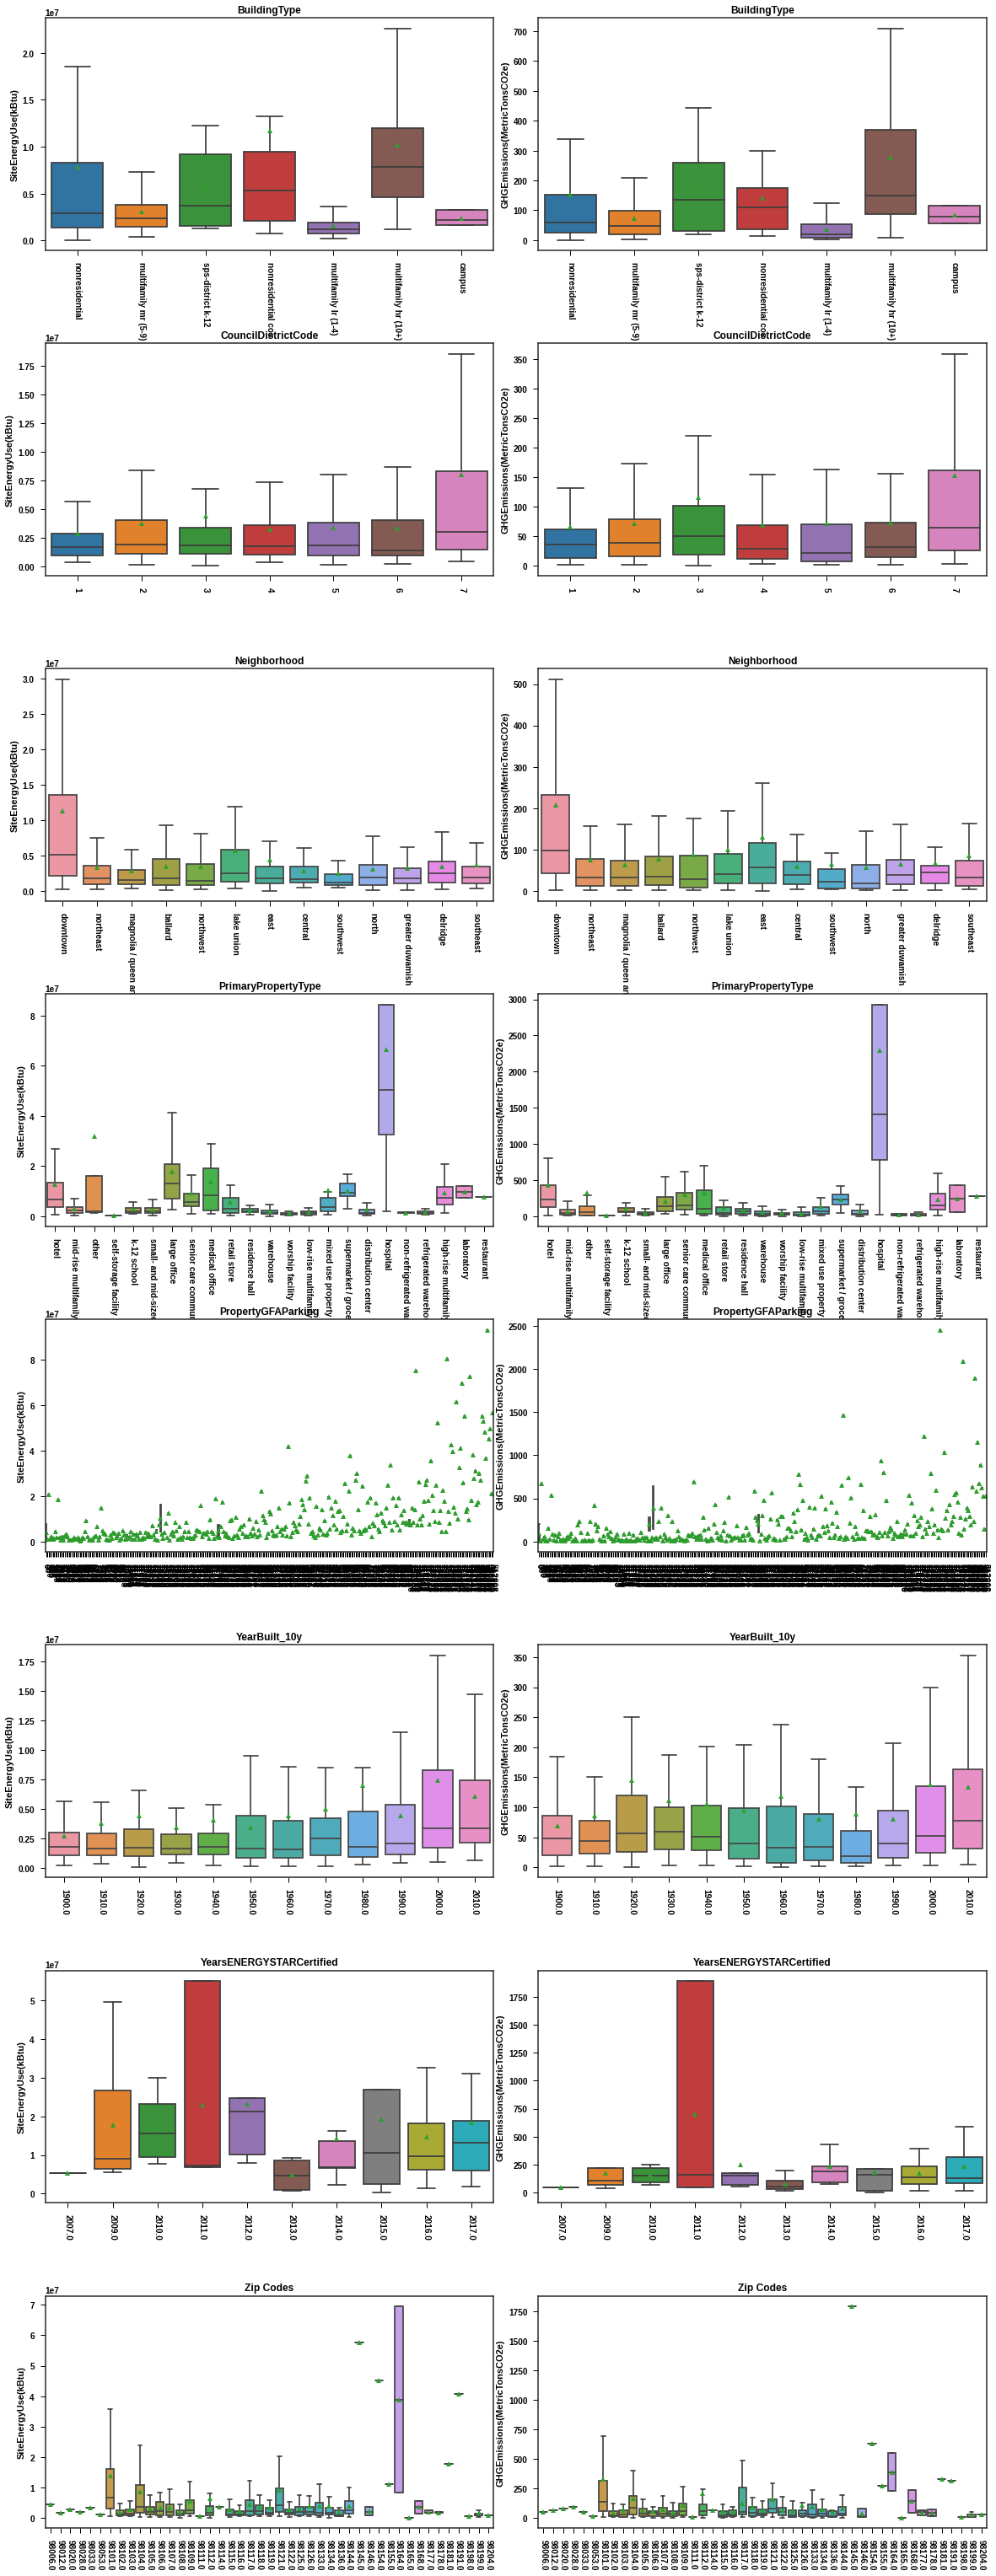

In [87]:
plt.style.use('seaborn-notebook') 

nc = 2
nf = 20

fig = plt.figure(figsize=(10*nc, 7*nf))
plt.subplots_adjust(wspace=0.1, hspace=0.2*2) #interspace entre graphiques

cc = -1
for icd in lVAR_discret[np.isin(lVAR_discret, ['NumberofFloors','NumberofBuildings', 'YearsENERGYSTARCertified_10y', 'ENERGYSTARScore', 'NumberofFloors', 'YearBuilt'], invert=True)]:
    for ici in lVAR_cible[:2]:
        cc = cc + 1

        ax = fig.add_subplot(nf, nc, (cc+1))
        g = sns.boxplot(data=dDATA_cible, y=ici, x=icd, showfliers=False, showmeans = True, ax = ax) #)
        g.set_xticklabels(g.get_xticklabels(), rotation=-90)

        ax.set_title(icd)
        #ax.set_ylabel('')
        ax.set_xlabel('')
        #ax.set_yscale('log')
        #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '35-CIBLE-Discret.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [88]:
lVAR_discret

array(['BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'YearBuilt', 'PropertyGFAParking',
       'ENERGYSTARScore', 'NumberofFloors', 'YearBuilt_10y',
       'YearsENERGYSTARCertified', 'YearsENERGYSTARCertified_10y',
       'Zip Codes'], dtype=object)

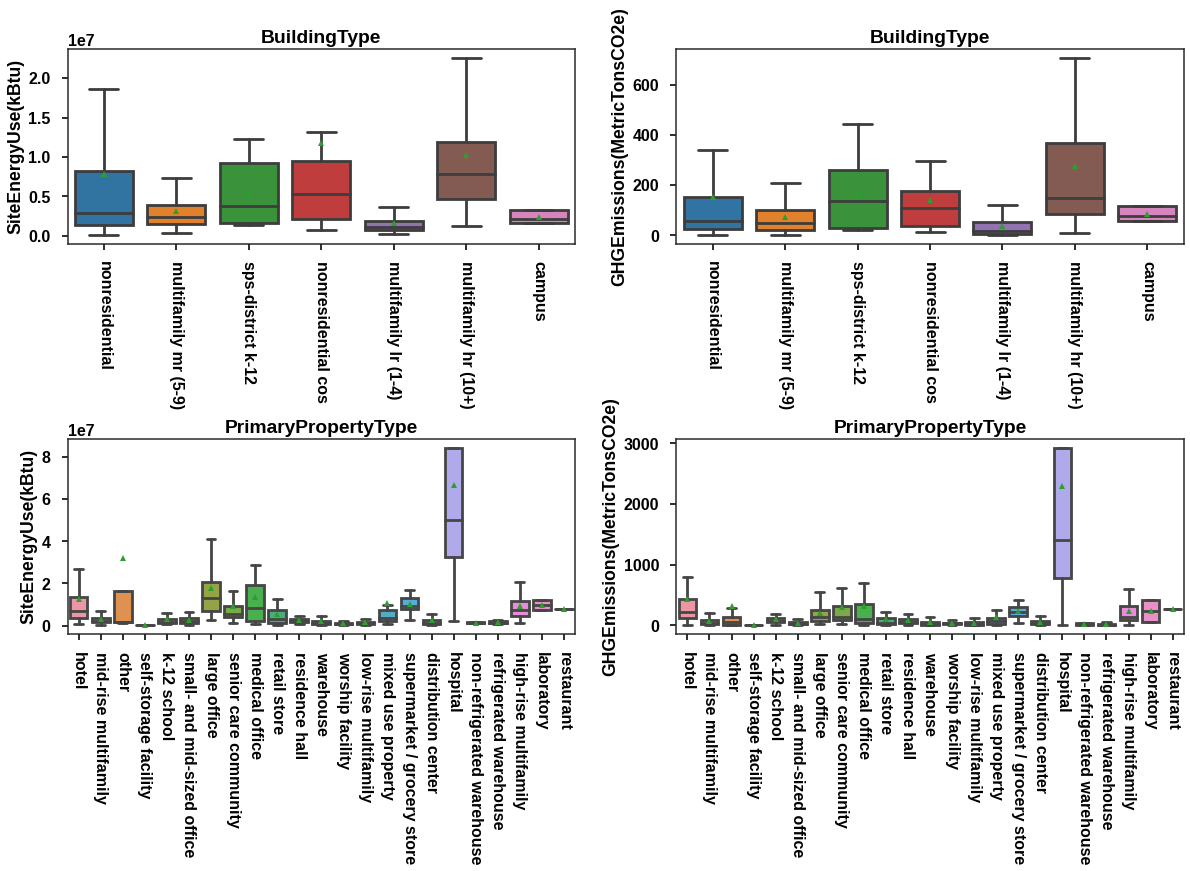

In [89]:
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 

nc = 2
nf = 20

fig = plt.figure(figsize=(10*nc, 7*nf))
plt.subplots_adjust(wspace=0.2, hspace=0.5*2) #interspace entre graphiques

cc = -1
for icd in ['BuildingType','PrimaryPropertyType']:
    for ici in lVAR_cible[:2]:
        cc = cc + 1

        ax = fig.add_subplot(nf, nc, (cc+1))
        g = sns.boxplot(data=dDATA_cible, y=ici, x=icd, showfliers=False, showmeans = True, ax = ax) #)
        g.set_xticklabels(g.get_xticklabels(), rotation=-90)

        ax.set_title(icd)
        #ax.set_ylabel('')
        ax.set_xlabel('')
        #ax.set_yscale('log')
        #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '35-CIBLE-Discret-Build-Property.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

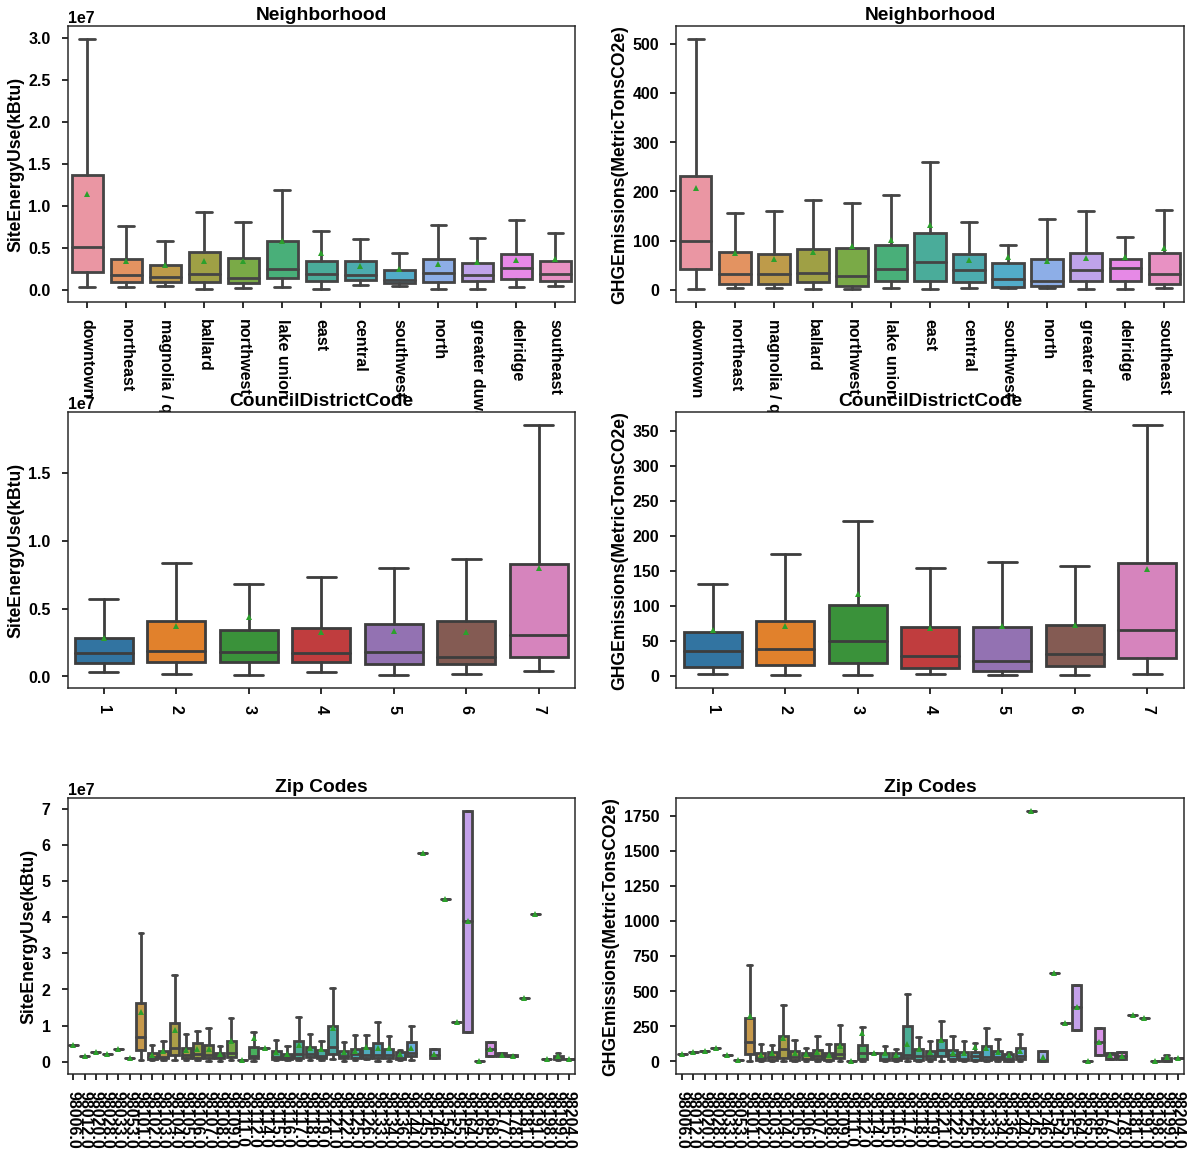

In [90]:
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 

nc = 2
nf = 20

fig = plt.figure(figsize=(10*nc, 7*nf))
plt.subplots_adjust(wspace=0.2, hspace=0.2*2) #interspace entre graphiques

cc = -1
for icd in ['Neighborhood','CouncilDistrictCode', 'Zip Codes']:
    for ici in lVAR_cible[:2]:
        cc = cc + 1

        ax = fig.add_subplot(nf, nc, (cc+1))
        g = sns.boxplot(data=dDATA_cible, y=ici, x=icd, showfliers=False, showmeans = True, ax = ax) #)
        g.set_xticklabels(g.get_xticklabels(), rotation=-90)

        ax.set_title(icd)
        #ax.set_ylabel('')
        ax.set_xlabel('')
        #ax.set_yscale('log')
        #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '35-CIBLE-Discret-Neig-Z-code.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

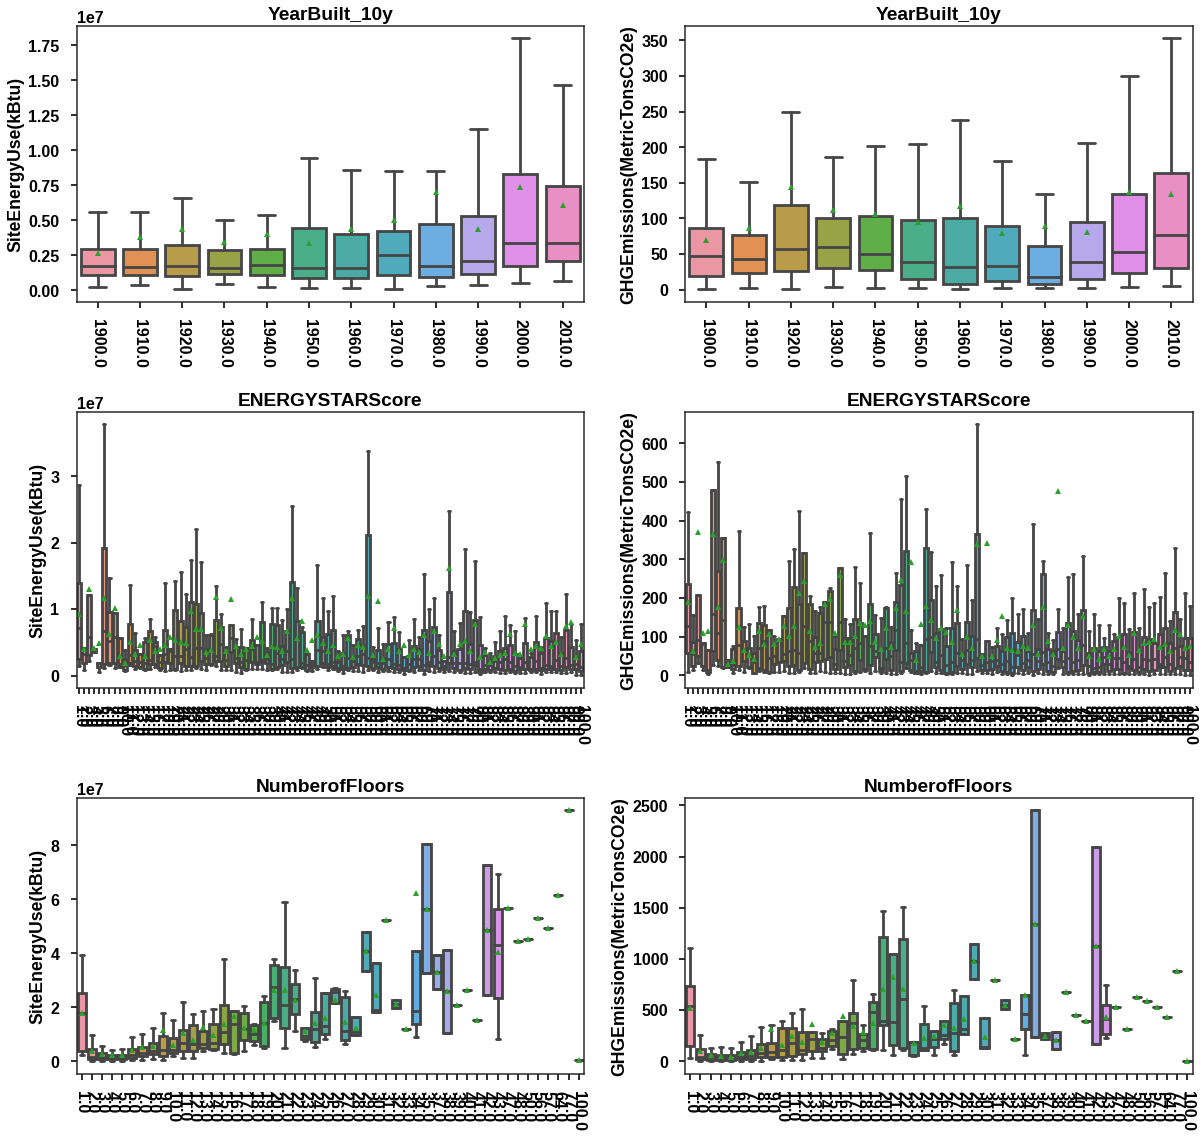

In [91]:
plt.style.use('seaborn-notebook') 
plt.style.use('seaborn-poster') 

nc = 2
nf = 20

fig = plt.figure(figsize=(10*nc, 7*nf))
plt.subplots_adjust(wspace=0.2, hspace=0.2*2) #interspace entre graphiques

cc = -1
for icd in ['YearBuilt_10y','ENERGYSTARScore', 'NumberofFloors']:
    for ici in lVAR_cible[:2]:
        cc = cc + 1

        ax = fig.add_subplot(nf, nc, (cc+1))
        g = sns.boxplot(data=dDATA_cible, y=ici, x=icd, showfliers=False, showmeans = True, ax = ax) #)
        g.set_xticklabels(g.get_xticklabels(), rotation=-90)

        ax.set_title(icd)
        #ax.set_ylabel('')
        ax.set_xlabel('')
        #ax.set_yscale('log')
        #ax.set_xscale('symlog', linthresh=10000000)
plt.show()
fig.savefig(direc0 + '35-CIBLE-Discret-year-e-floor.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

In [92]:
lVAR_discret

array(['BuildingType', 'CouncilDistrictCode', 'Neighborhood',
       'PrimaryPropertyType', 'YearBuilt', 'PropertyGFAParking',
       'ENERGYSTARScore', 'NumberofFloors', 'YearBuilt_10y',
       'YearsENERGYSTARCertified', 'YearsENERGYSTARCertified_10y',
       'Zip Codes'], dtype=object)

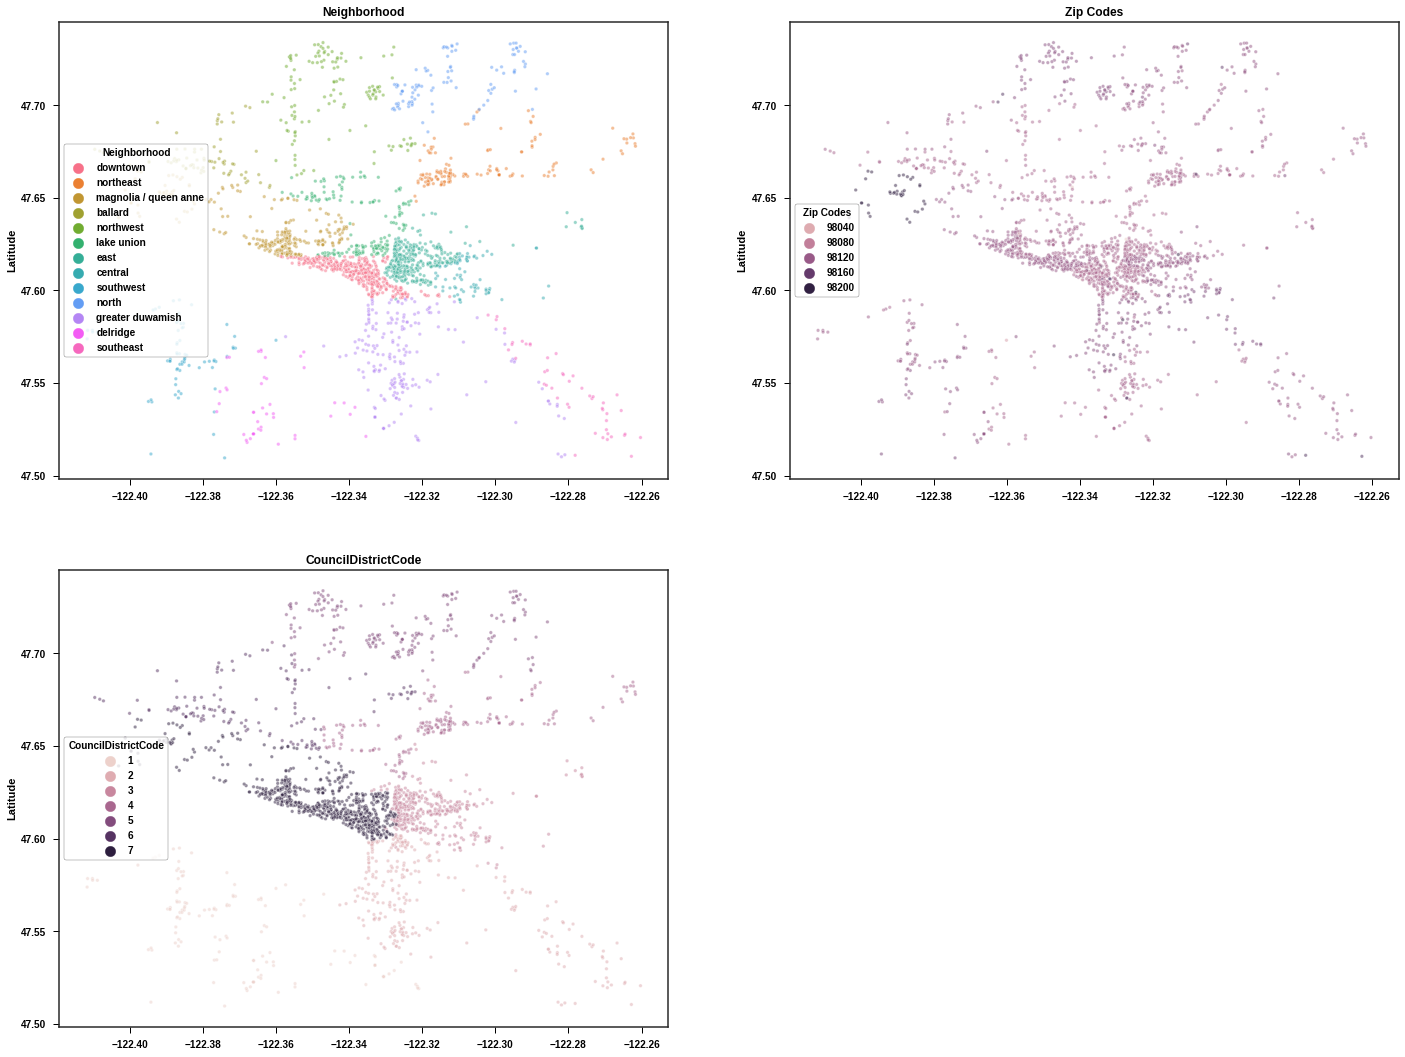

In [93]:
plt.style.use('seaborn-notebook') 
plt.rcParams["figure.figsize"] = [6, 5]

nc = 2
nf = 20

fig = plt.figure(figsize=(6*nc*2, 5*nf*2))
plt.subplots_adjust(wspace=0.2, hspace=0.2) #interspace entre graphiques

cc = -1
for icd in ['Neighborhood', 'Zip Codes', 'CouncilDistrictCode',]:
    cc = cc + 1

    ax = fig.add_subplot(nf, nc, (cc+1))
    g = sns.scatterplot(data=dfDATA2, x='Longitude', y='Latitude', hue=icd, marker='.', alpha=0.5)
    #g.set_xticklabels(g.get_xticklabels(), rotation=-90)

    ax.set_title(icd)
    #ax.set_ylabel('')
    ax.set_xlabel('')
    #ax.set_xscale('symlog', linthresh=10000000)
    
    
plt.show()
fig.savefig(direc0 + '35-MAP-zip.pdf', bbox_inches ="tight", pad_inches = 0.1, format='pdf')

### Link and brush

### Nongraphical techniques

In [94]:
lVAR_cible[:2]

['SiteEnergyUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)']

# Export to CSV

In [95]:
dfDATA2.columns

Index(['BuildingType', 'CouncilDistrictCode', 'ENERGYSTARScore',
       'Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'Latitude',
       'Longitude', 'NaturalGas(kBtu)', 'Neighborhood', 'NumberofFloors',
       'OtherFuelUse(kBtu)', 'PrimaryPropertyType', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'SPD Beats', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'YearBuilt', 'YearsENERGYSTARCertified', 'Zip Codes',
       'TotalEnergy(kBtu)', 'YearBuilt_10y', 'YearsENERGYSTARCertified_10y'],
      dtype='object')

In [96]:
lVAR_ML = np.concatenate((lVAR_cible[:2], ['PropertyGFABuilding(s)', 'NumberofFloors','PrimaryPropertyType', 'Neighborhood', 'YearBuilt_10y', 'ENERGYSTARScore']), axis=None)
dfML = dfDATA2[lVAR_ML]

In [97]:
dfML.to_csv(direc0 + 'dfML.csv', index=True)
dfML.head()

,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),PropertyGFABuilding(s),NumberofFloors,PrimaryPropertyType,Neighborhood,YearBuilt_10y,ENERGYSTARScore
OSEBuildingID,,,,,,,,
1,7226362.5,249.979996,88434,13.0,hotel,downtown,1920.0,60.0
2,8387933.0,295.859985,88502,12.0,hotel,downtown,1990.0,61.0
3,72587024.0,2089.280029,759392,42.0,hotel,downtown,1960.0,43.0
5,6794584.0,286.429993,61320,11.0,hotel,downtown,1920.0,56.0
8,14172606.0,505.010010,113580,19.0,hotel,downtown,1980.0,75.0


In [98]:
dfML.dtypes[0]


dtype('float32')